# データサイエンス演習 樋口
## リンク類
- シラバス<br>[シラバス](https://room.chuo-u.ac.jp/ct/syllabus_5646175)

# 1-1

<img src="img/1-1-1.png">
<img src="img/1-1-2.png">

### ファイルの読み込み
```r
変数 <- read.csv("ファイルパス", header=⭕️)
# header: ヘッダーがあるか(bool)
```

[1] 146
[1] 12.9 17.3


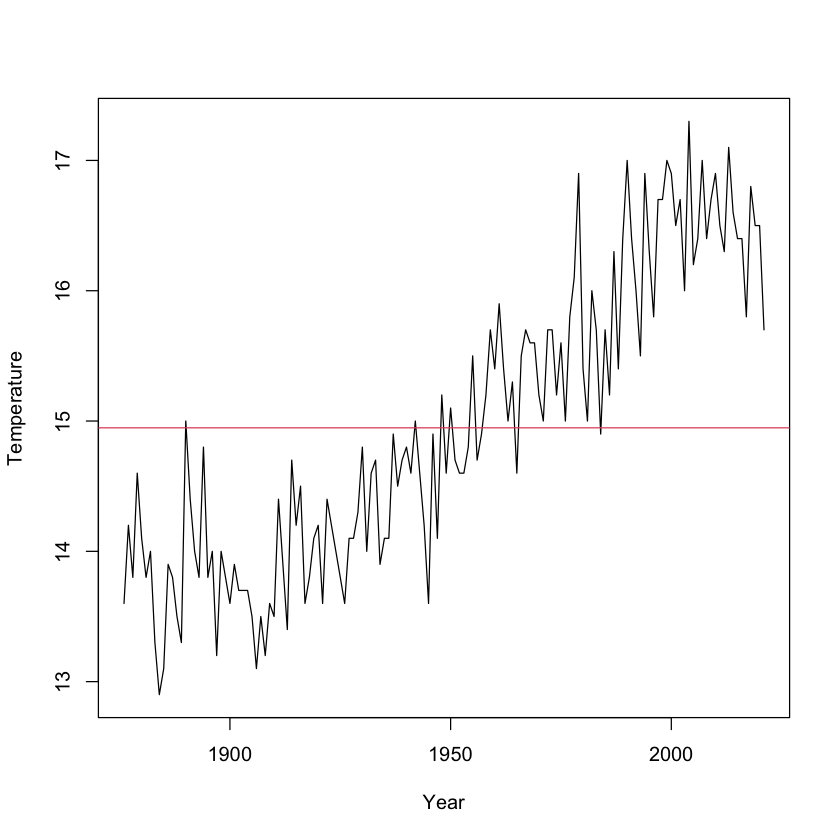

In [59]:
# [1.1]
# ファイルの読み込み
dat1 <- read.csv("data/TokyoTemp2.csv",header=T) # csv形式ファイルの読み込み

# レコード数の取得
print(length(dat1$Year))

# シリーズの生成
Temp <- dat1$Temperature

# 最大, 最小の出力
print(range(Temp))

# 折れ線グラフの出力
plot(dat1,type="l")
abline(h=mean(Temp),col=2) # absolute line (col=線の色)

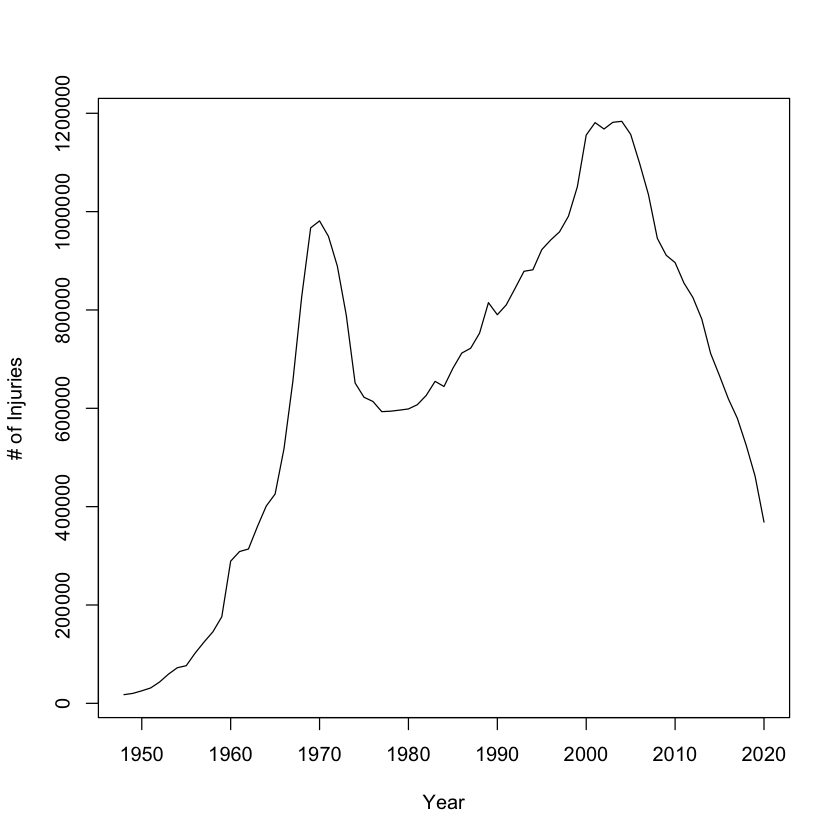

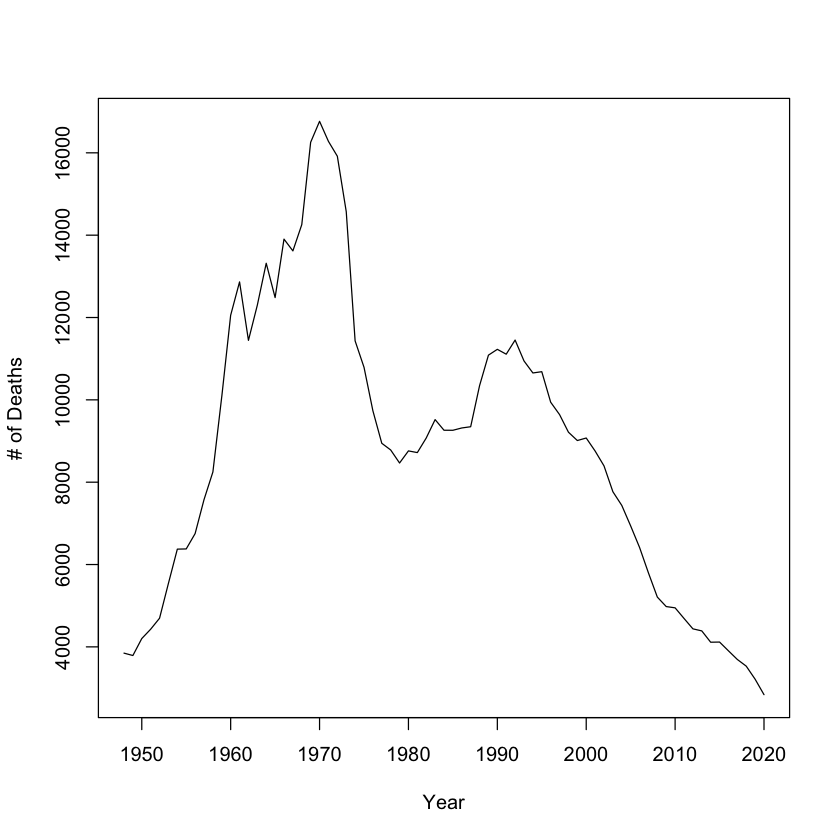

In [60]:
# [1.1.2]
# データの読み込み
dat2 <- read.csv("data/TrafficAccidents.csv",header=T) # csv形式ファイルの読み込み

# plot(xデータ, yデータ, type="折れ線", xlab="xのラベル", ylab="yのラベル")
plot(dat2$Year,dat2$Injuries,type="l",xlab="Year",ylab="# of Injuries")
plot(dat2$Year,dat2$Deaths,type="l",xlab="Year", ylab="# of Deaths")

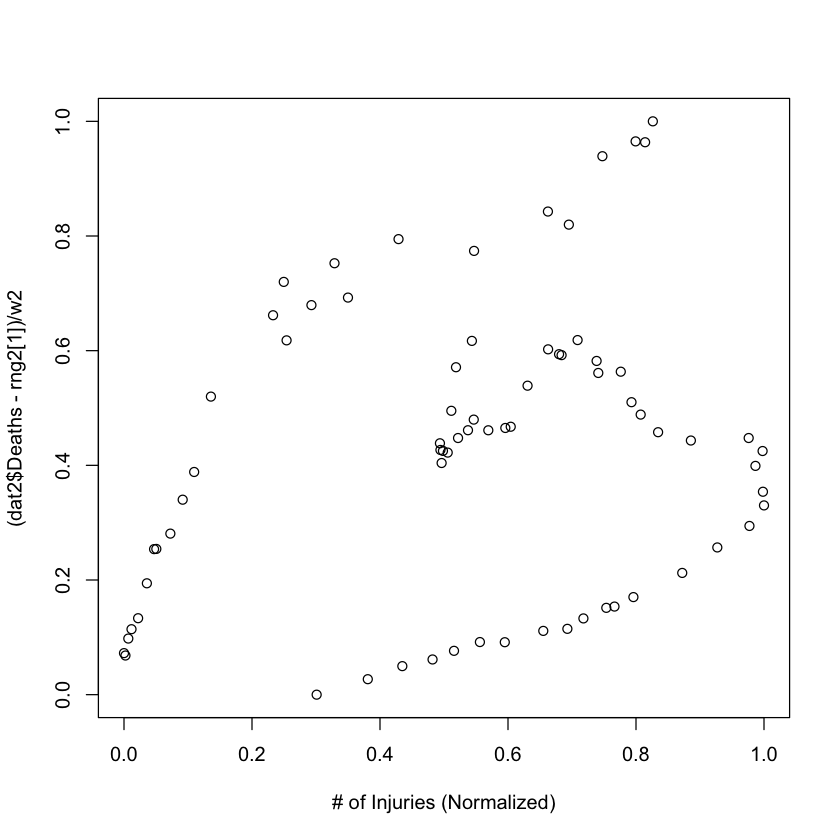

In [61]:
# [1.1.3]
rng1 <- range(dat2$Injuries)
rng2 <- range(dat2$Deaths)
w1 <- rng1[2]-rng1[1] # 幅(最大 - 最小)
w2 <- rng2[2]-rng2[1]

# 規格化(データの最小値を0として幅で割る)してプロット
plot((dat2$Injuries-rng1[1])/w1, (dat2$Deaths-rng2[1])/w2,xlab="# of Injuries (Normalized)")

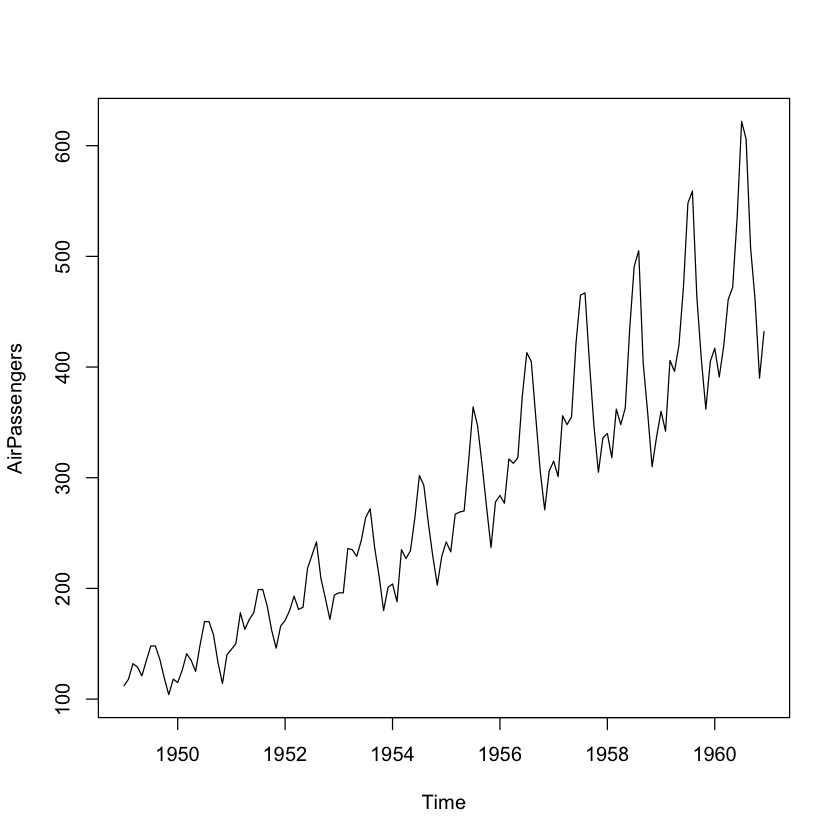

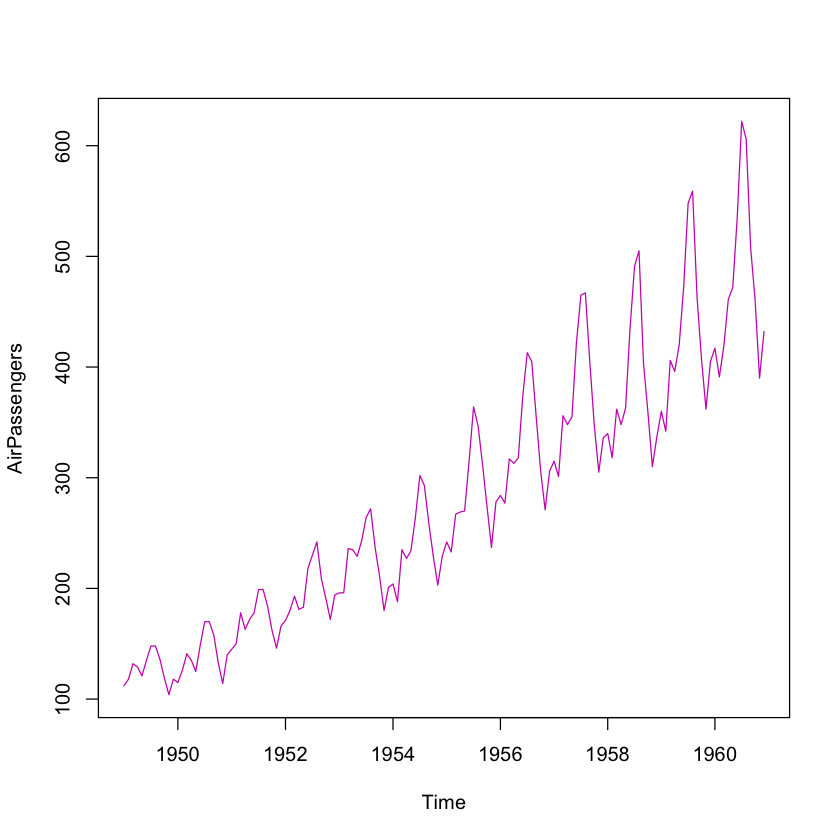

In [ ]:
# [1.1.4]
plot(AirPassengers, col=1)
plot(AirPassengers, log="y", col=6) #log=対数軸にする軸

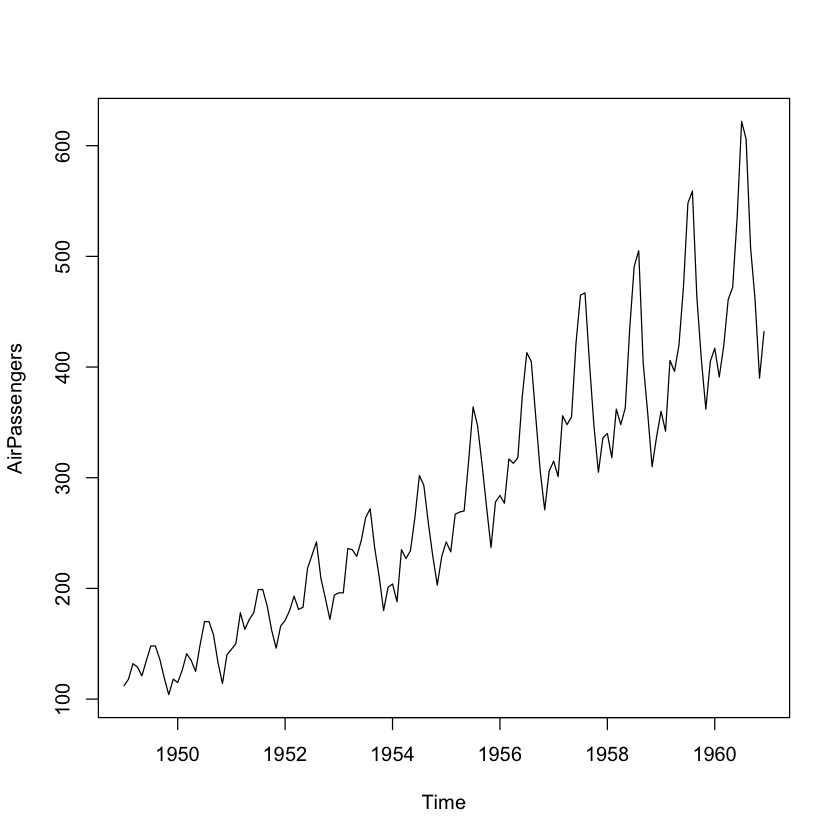

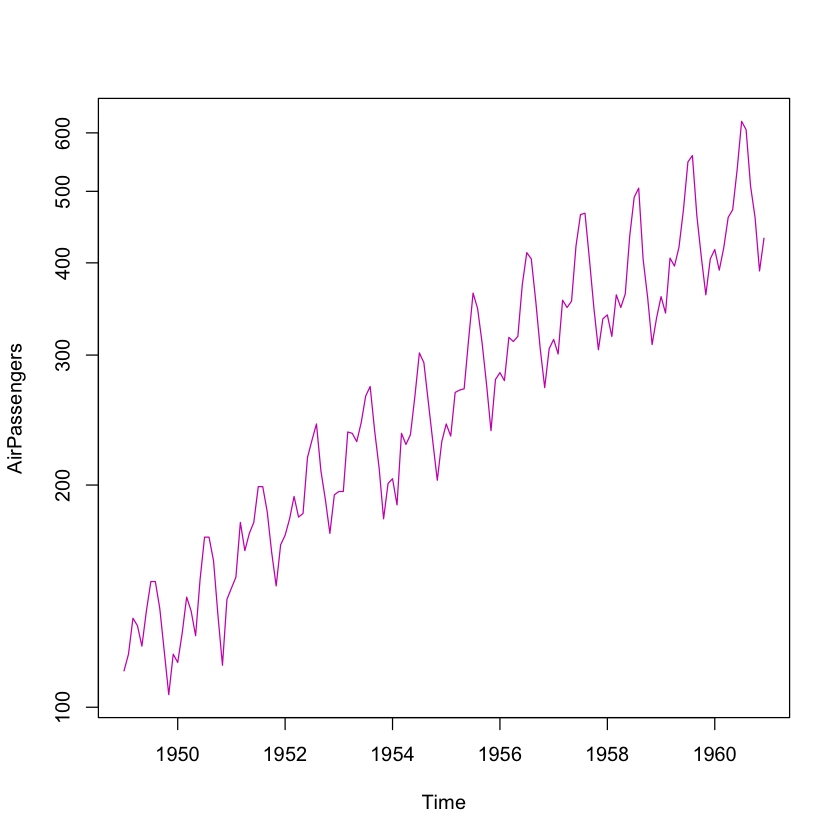

In [5]:
# [1.1.4]
plot(AirPassengers, col=1)
plot(AirPassengers, log="y", col=6)

In [6]:
# [1.1.5]
install.packages("TSSS")  # パッケージのインストール
library(TSSS)  # ライブラリーの R work領域への読み込み


ダウンロードされたパッケージは、以下にあります
	/var/folders/3b/3hxgpzc57b70j4b1d7my6wfc0000gn/T//RtmpKr73lU/downloaded_packages


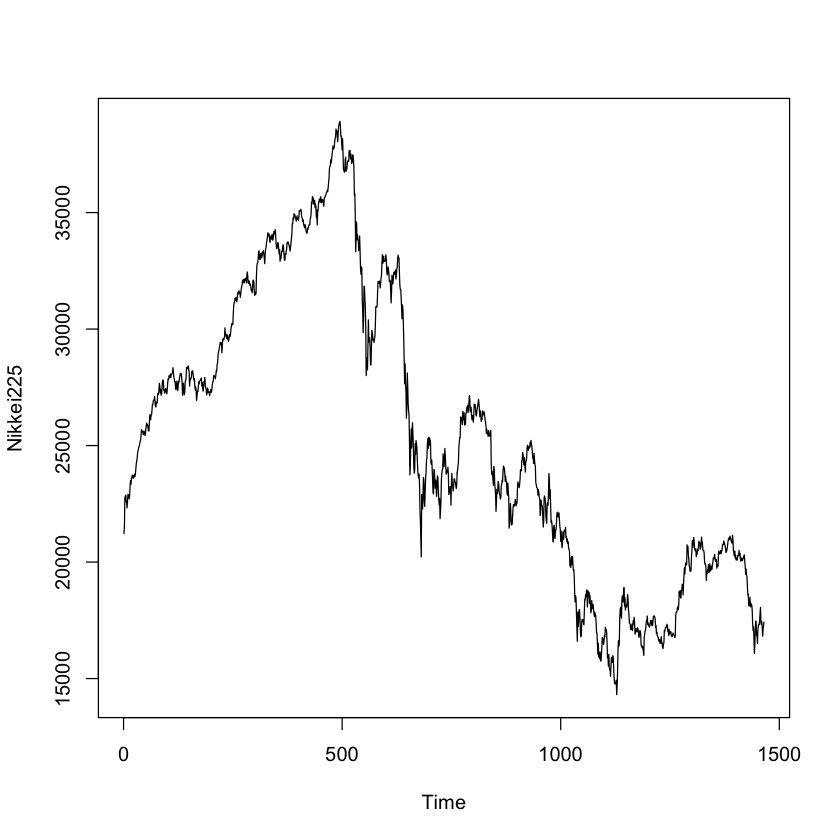

In [66]:
# 日経平均終値データ in TSSS のプロット、自己相関、パワースペクトル
data( Nikkei225 )
plot( Nikkei225 )

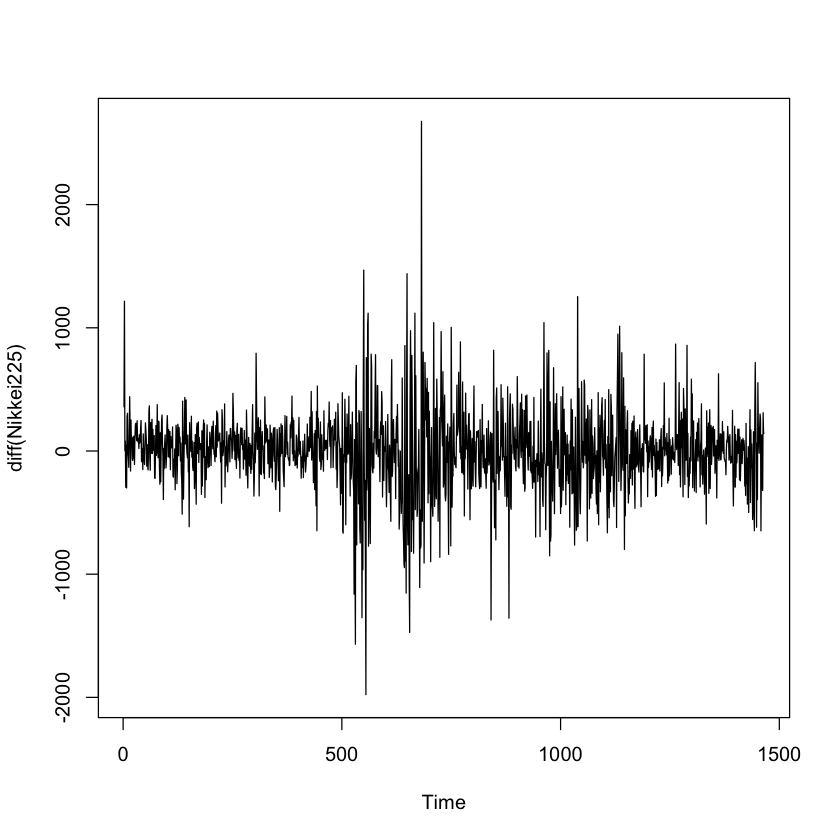

In [68]:
# [1.1.6]
# 前後での変化プロット
plot(diff(Nikkei225),type="l")

# 1-2

<img src="img/1-2.png">

In [76]:
# [1.2.1]
dat2 <- read.csv("data/2016_ec.csv",header=T) # csv形式ファイルの読み込み
# [1.2.2]
N_ec <- length(dat2$Day)
print(N_ec)
# [1.2.3]
ec14 <- dat2$h14
# [1.2.4]
print(mean(ec14))
print(mean(ec14, na.rm=TRUE)) # None removed
#  print( ec14[69:72] )

[1] 98
[1] NA
[1] 2062.165


# 2-1
<img src="img/2-1.png">

[1] 2062.165
[1] 2090.000 2062.165 1020.000 1050.000


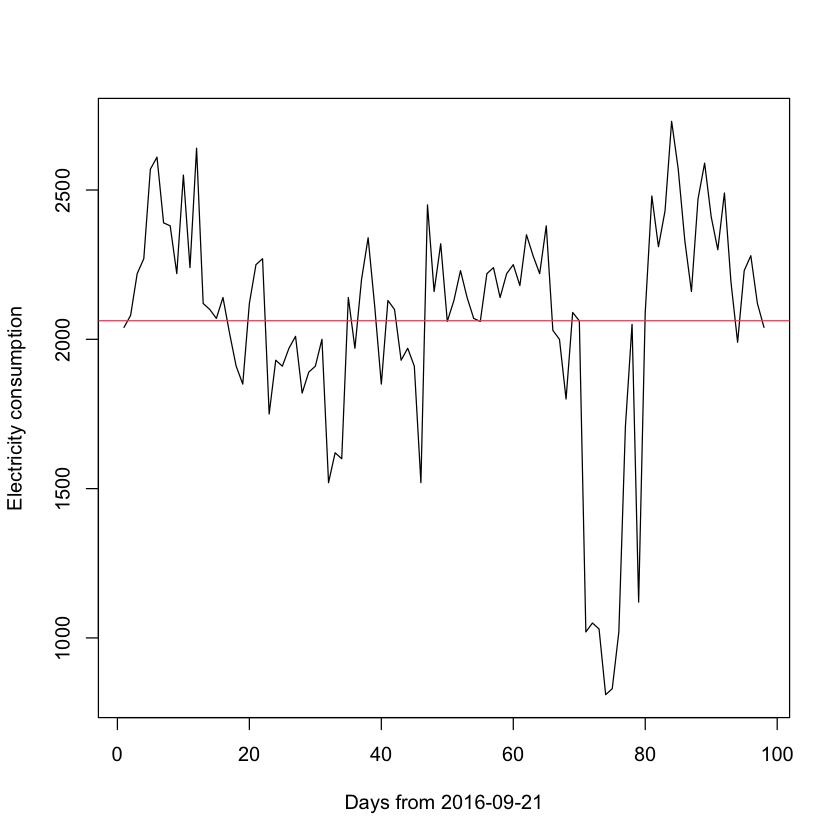

In [88]:
# [2.1.1]
avg14 <- mean(ec14, na.rm = TRUE)  # na.rmは引数で「NA remove」の略
print( avg14 )
# [2.1.2]
ec14[ is.na(ec14) == TRUE ] <- avg14  # is.na():  NAがある（TRUE）かどうかを返す関数
print( ec14[69:72] )
# [2.1.3]
# print( range(ec14) )
plot(ec14,type="l",xlab="Days from 2016-09-21", ylab="Electricity consumption")
abline(h=mean(ec14),col=2)

# 2-2
<img src="img/2-2.png">

[1] 98 25


[1] 98 24
[1] 2352
[1] "numeric"


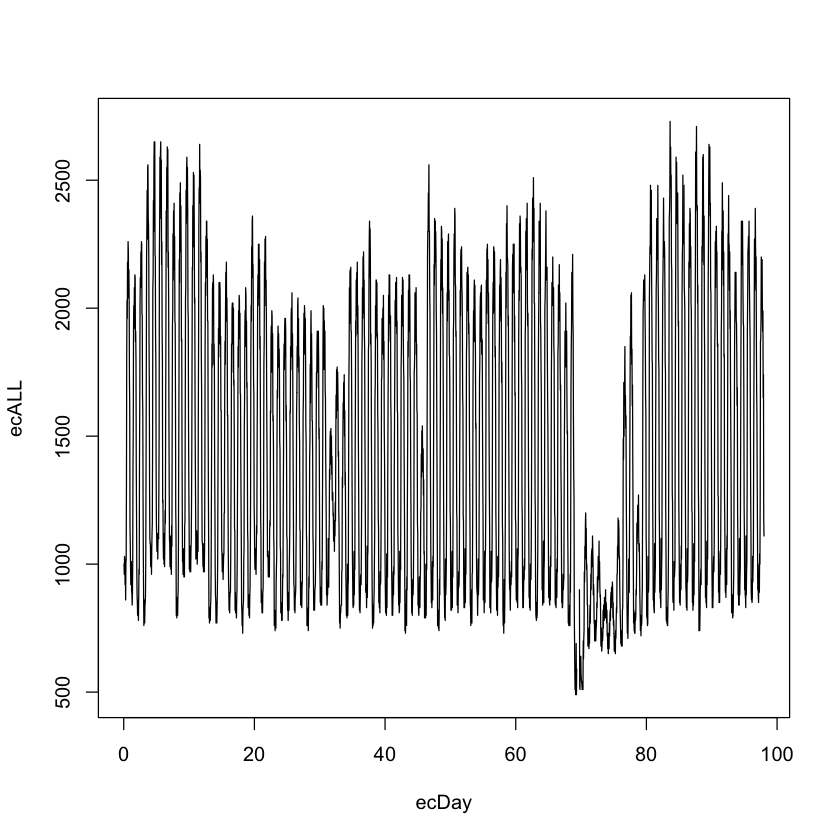

In [91]:
# [2.2.1]
# print(class(dat2$Day))
Matrix_A <- as.matrix(dat2)
print(dim(Matrix_A))

# [2.2.2]
Matrix_B <- Matrix_A[,-1]
# print(Matrix_B[1,])
print(dim(Matrix_B))

# [2.2.3]
ecALL <- as.numeric(c(t(Matrix_B)))
# c() 演算は、列方向を優先して１次元ベクトルにする.
# 行方向を優先するため、まず転置をして、c()演算を行う。

# [2.2.4]
print(length(ecALL))
print(class(ecALL))
ecDay <- seq(from=1,to=length(ecALL))
ecDay <- ecDay/24 # 最初のデータから何日目かを表すベクトル（時系列）
plot(ecDay,ecALL,type="l")
# print(ecALL[1:48])

# 2-3
<img src="img/2-3.png">

In [12]:
# [2.3.1]
date <- as.Date("2016-09-21")
weekday <- weekdays(date)
print(weekday)  # "Wednesday"が出力される

[1] "水曜日"


In [92]:
# [2.3.2]
#rep = repeat
DayofWeek <- rep(c(4:7,1:3), length.out = N_ec) #　最初の日は水曜日=4 から始まる。
print(DayofWeek)

 [1] 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6
[39] 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2
[77] 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3


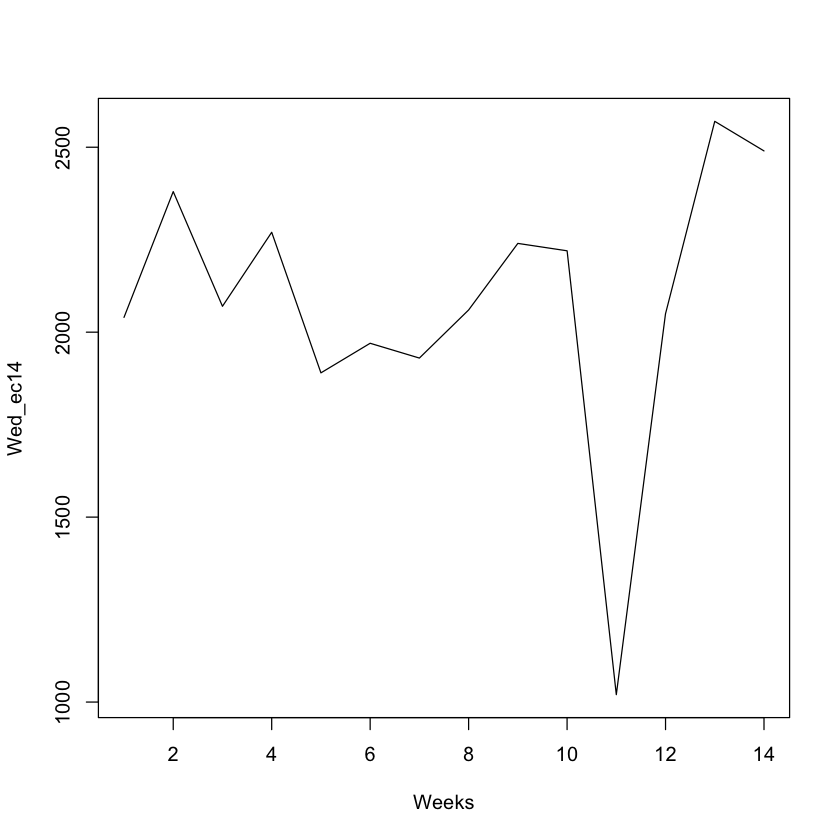

In [93]:
# [2.3.3]
Wed_ec14 <- ec14[ DayofWeek == 4]
# print(Wed_ec12)
plot(Wed_ec14,type="l", xlab="Weeks")

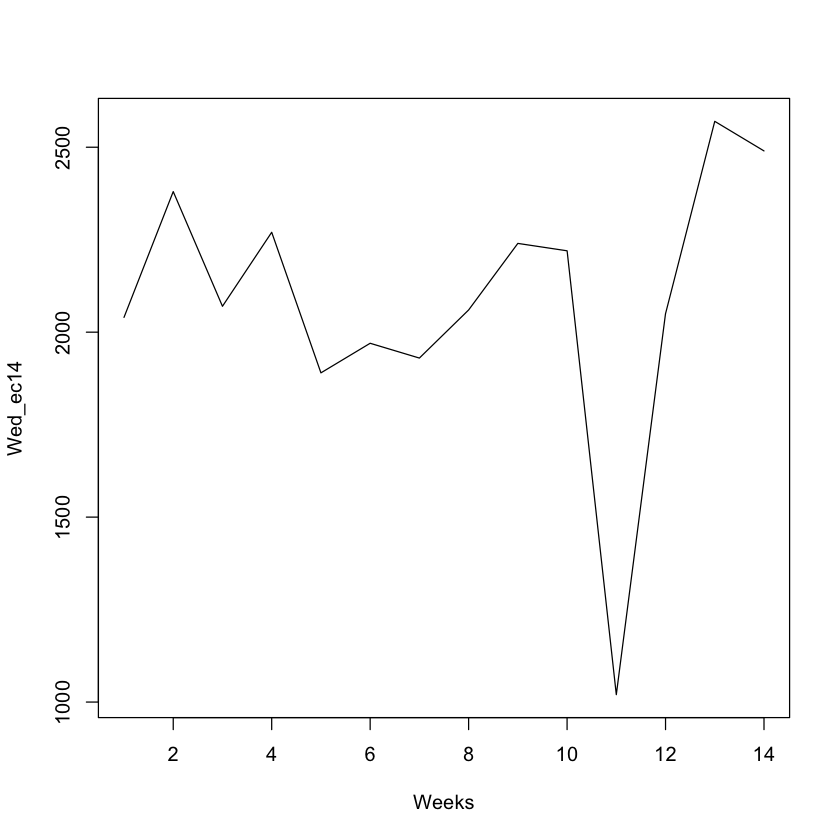

In [94]:
# [2.3.3b]
Wed_ec14 <- c( Matrix_B[ DayofWeek == 4, 15])
# print(Wed_ec12)
plot(Wed_ec14,type="l", xlab="Weeks")

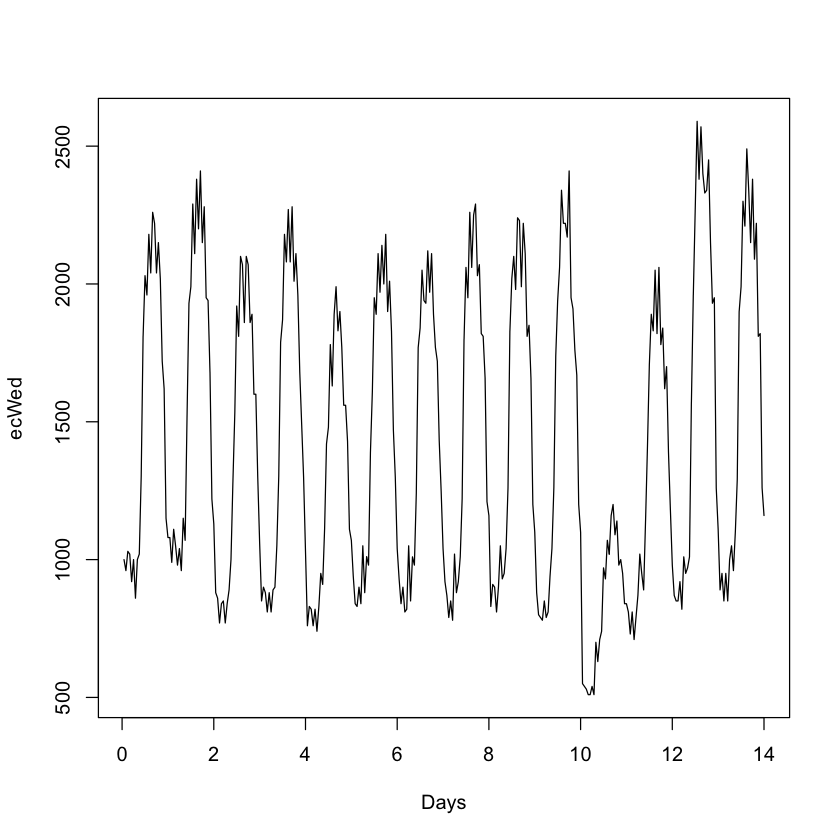

In [95]:
# [2.3.4]
ecWed <- as.numeric(c(t(Matrix_B[ DayofWeek == 4, ])))
# 前述した、c()演算の列方向優先を変更するため、一度行列の転置をとる。
# 水曜日のみの24時間変動
N_Wed <- length(ecWed)
ecDayW <- seq(from=1,to=N_Wed)
ecDayW <- ecDayW/24
plot( ecDayW, ecWed, type="l", xlab="Days")

# 3-1

<img src="img/3-1.png">

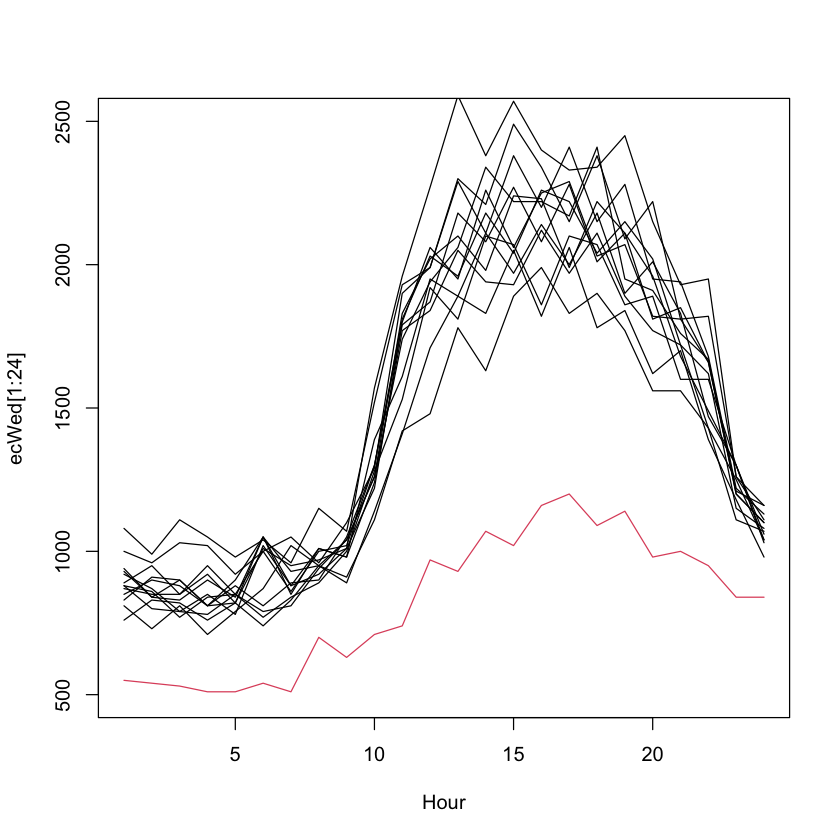

In [96]:
# [3.1.1]
HourinDay <- rep(c(1:24), length.out = N_Wed) #　最初の時間帯は0時台。
N_WedDay <- N_Wed/24
plot(HourinDay[1:24], ecWed[1:24], type="l",ylim=c(500,2500),xlab="Hour")
for (kk in 2:N_WedDay) {
  k1 <- (kk-1)*24+1
  k2 <-  kk*24
if( kk != 11)
  lines(HourinDay[k1:k2], ecWed[k1:k2])
else
  lines(HourinDay[k1:k2], ecWed[k1:k2],col=2)
}

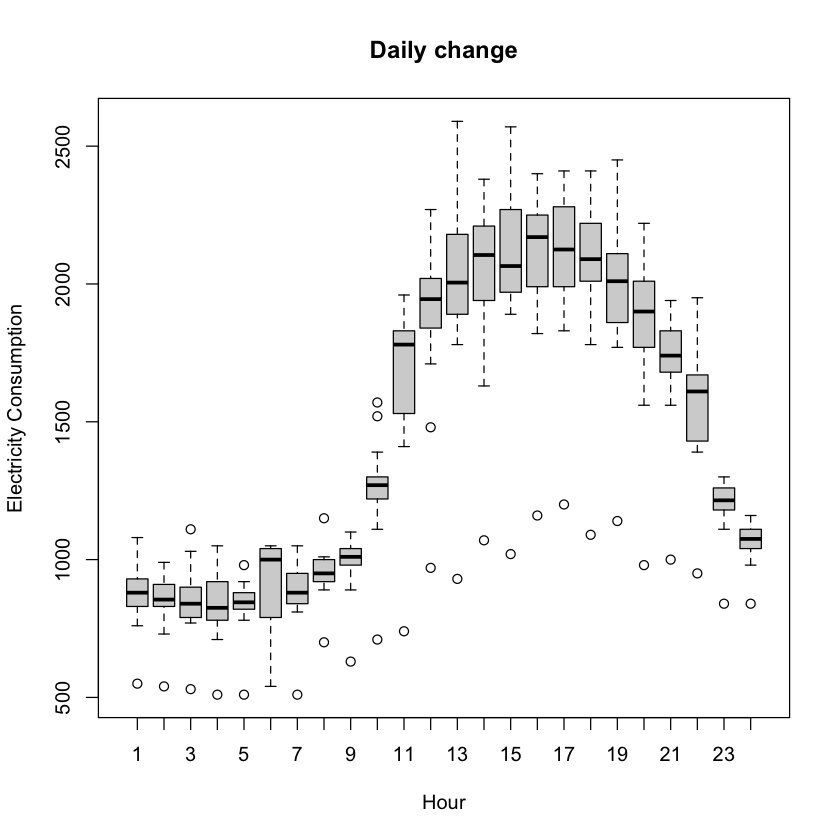

In [18]:
# [3.1.2]
dat3 <- data.frame(group=HourinDay, value=ecWed)
boxplot(value ~ group, data=dat3, main="Daily change", xlab="Hour", ylab="Electricity Consumption")

[1] 11


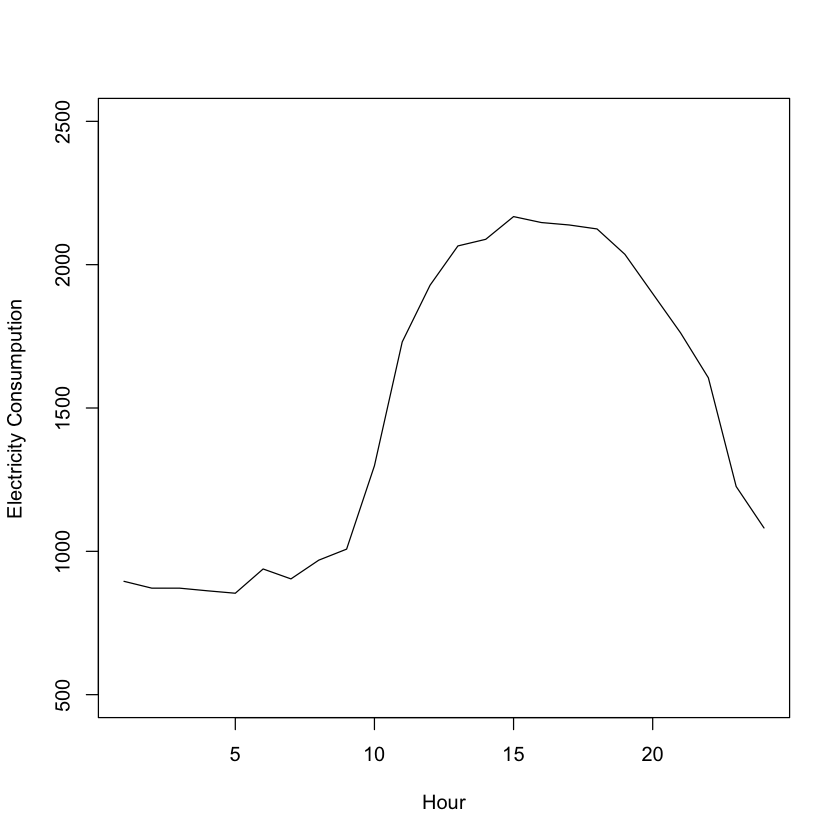

In [19]:
# [3.1.3]
Wed_ec15 <- ecWed[ HourinDay == 15 ]  #  水曜日の14時台の時系列を作成
# print(Wed_ec15)
print( which.min( Wed_ec15 ) )  #  値が一番小さくなる要素番号を求める。
k1 <- 10*24
k2 <- 11*24+1
k3 <- N_Wed
# print(c(k1,k2,k3))
ecWedR <- c(ecWed[(1:k1)],ecWed[(k2:k3)])
HourinDayR <- rep(c(1:24), length.out = (N_Wed-24))
# print(Wed_ecDayr)
# print(HourinDayr)
aveH <- numeric(24)
for (kk in 1:24) {
  aveH[kk]  <- mean(ecWedR[ HourinDayR == kk ])
}
# print(aveH)
plot(seq(1:24),aveH,type="l",xlab="Hour",ylab="Electricity Consumpution",ylim=c(500,2500))

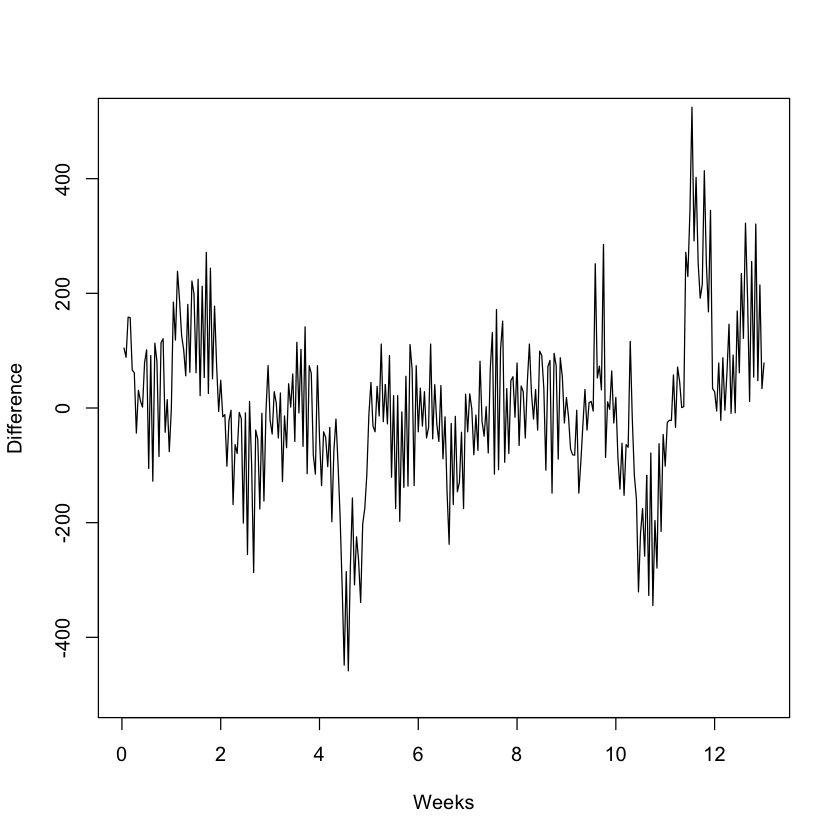

In [20]:
# [3.1.4]
Diff_ecWedR <- ecWedR
for (kk in 1:(N_WedDay-1)) {
  k1 <- (kk-1)*24+1
  k2 <-  kk*24
  Diff_ecWedR[k1:k2] <- ecWedR[k1:k2]-aveH
}
ecDayWD <- seq(from=1,to=(N_WedDay-1)*24)
ecDayWD <- ecDayWD/24
plot(ecDayWD, Diff_ecWedR, type="l",ylim=c(-500,500),xlab="Weeks",ylab="Difference")

# 3-2
<img src="img/3-2.png">

### 自己相関関数について
> 時系列データがどの程度似ているか(=過去の値との関係の強さ) [-1,1]

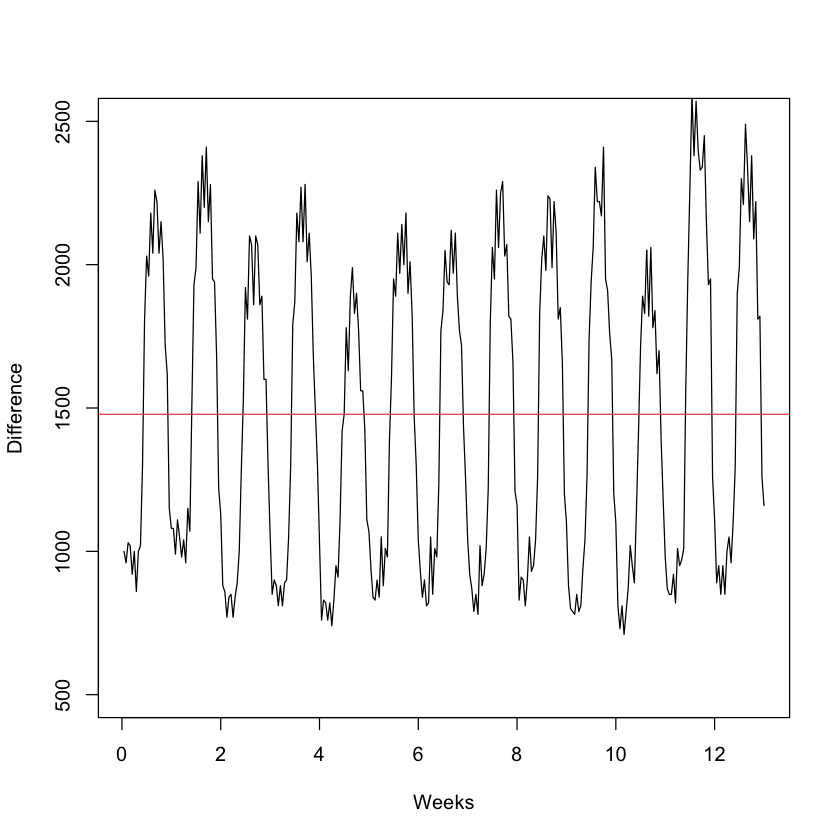

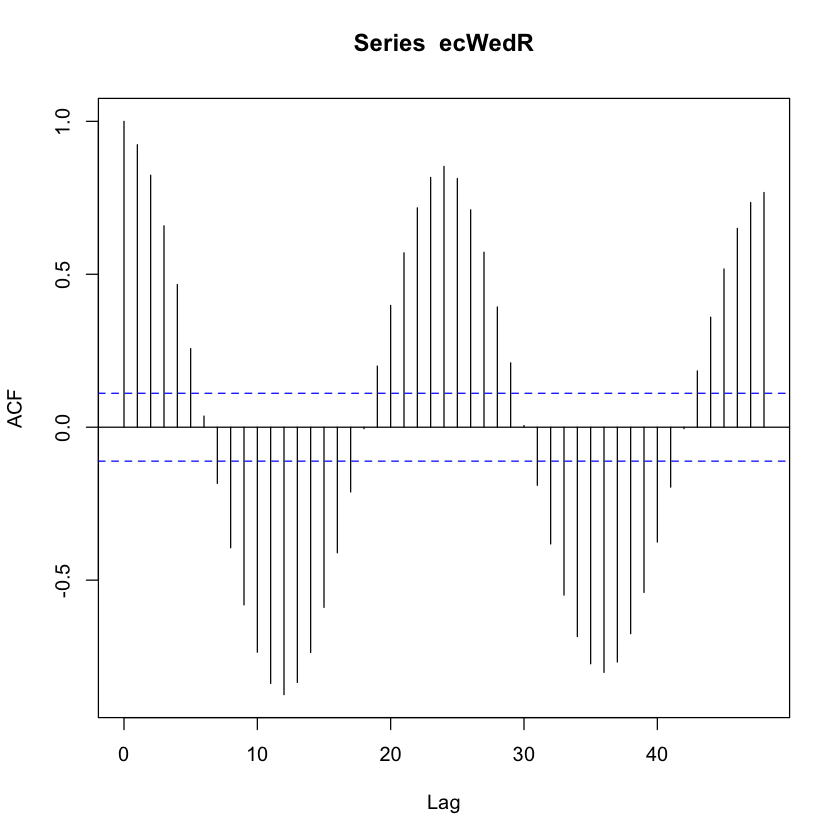

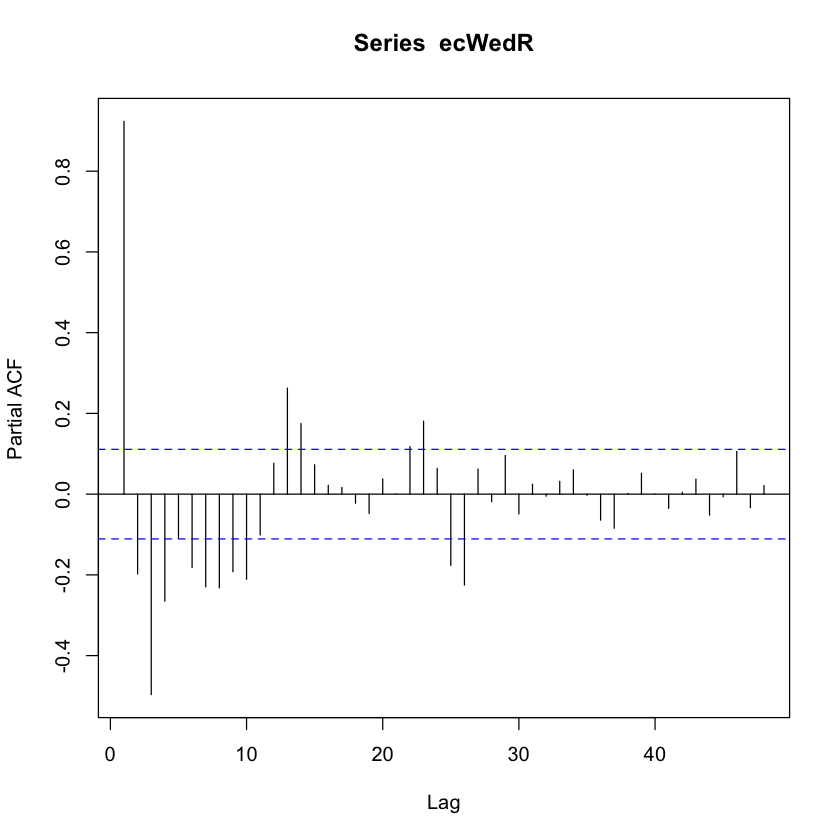

In [97]:
# [3.2.1]
plot(ecDayWD, ecWedR, type="l",ylim=c(500,2500),xlab="Weeks",ylab="Difference")
abline(h=mean(ecWedR),col=2)
# 自己相関関数をもとめる
acf(ecWedR, lag.max=48)
# acf(Diff_ecWedR)
# 偏相関関数をもとめる
acf(ecWedR,type="partial",lag.max=48)

[1] 1478.077


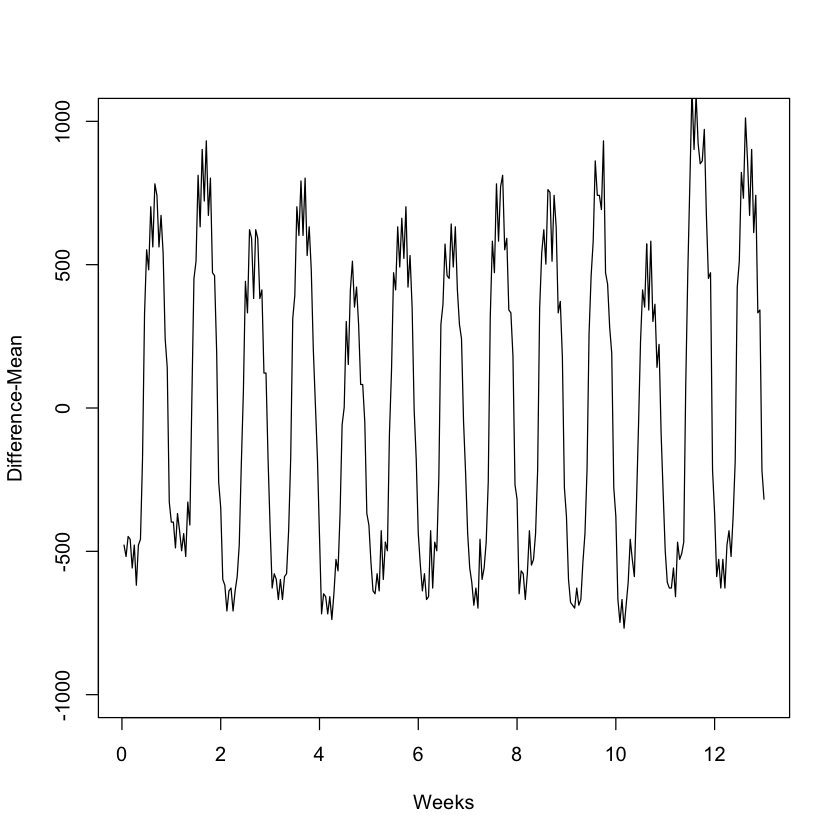

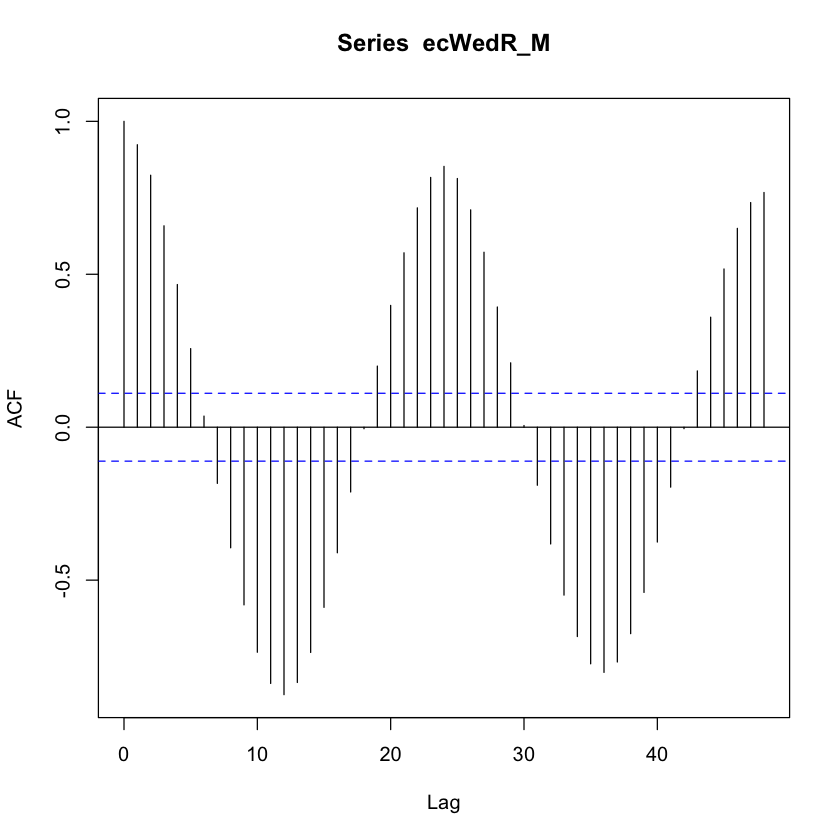

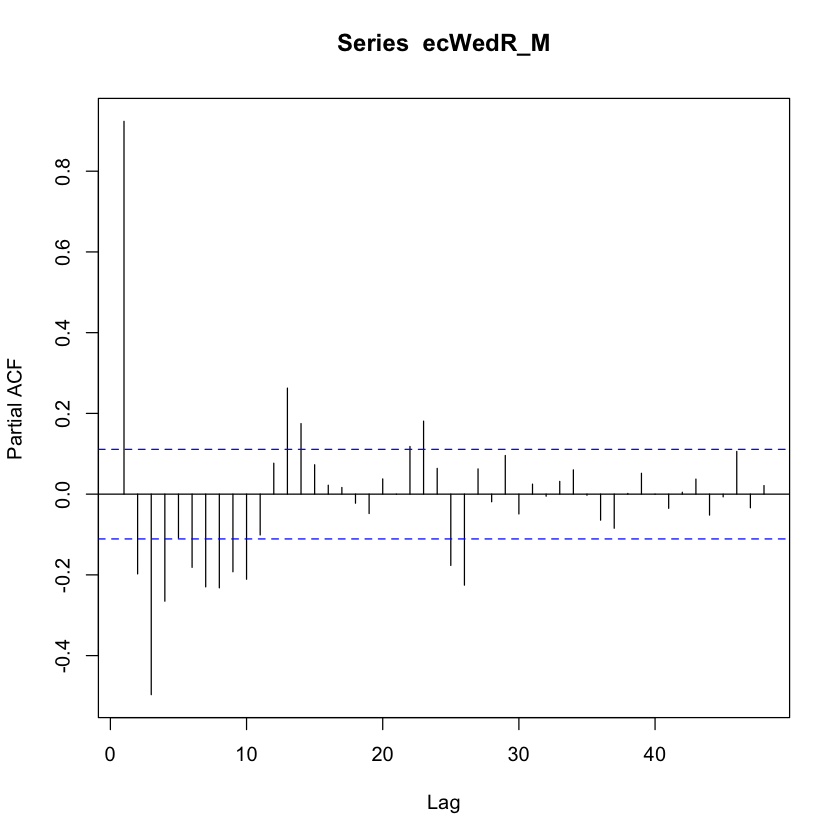

In [22]:
# [3.2.2]
# 自己相関関数をもとめる
print(mean(ecWedR))
ecWedR_M <- ecWedR - mean(ecWedR)
plot(ecDayWD, ecWedR_M, type="l",ylim=c(-1000,1000),xlab="Weeks",ylab="Difference-Mean")
acf(ecWedR_M, lag.max=48)
# acf(Diff_ecWedR)
# 偏相関関数をもとめる
acf(ecWedR_M,type="partial", lag.max=48)

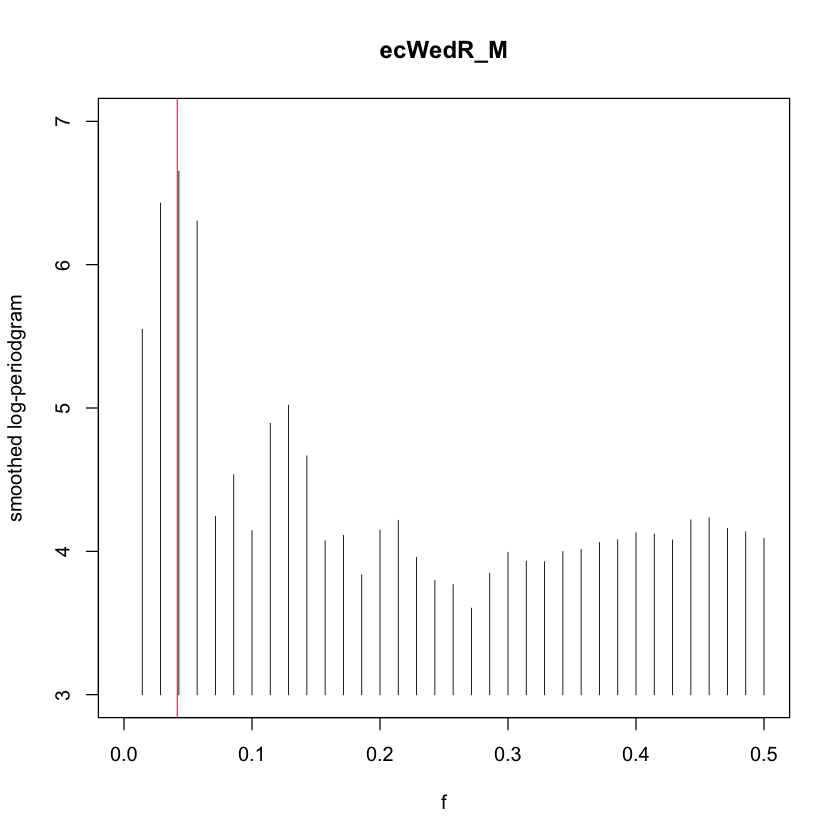

In [23]:
# [3.2.3]
period( ecWedR_M )  # ペリオドグラムを求める
abline( v=c(1/24), col=2)

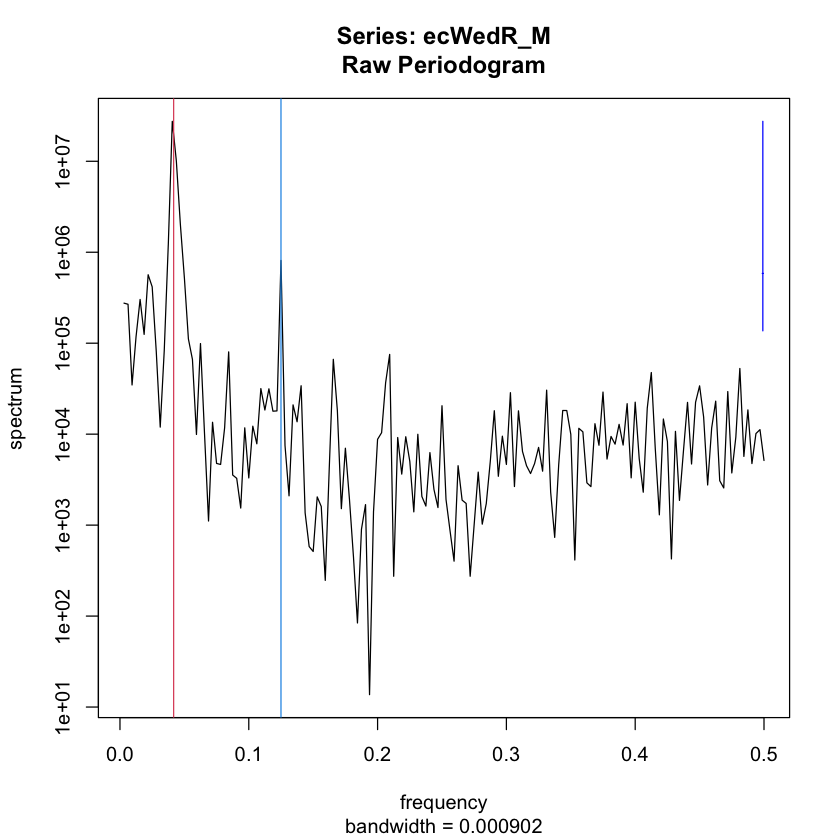

In [24]:
# [3.2.3b]
spec.pgram(ecWedR_M)
abline(v=1/24,col=2)
abline(v=1/8,col=4)

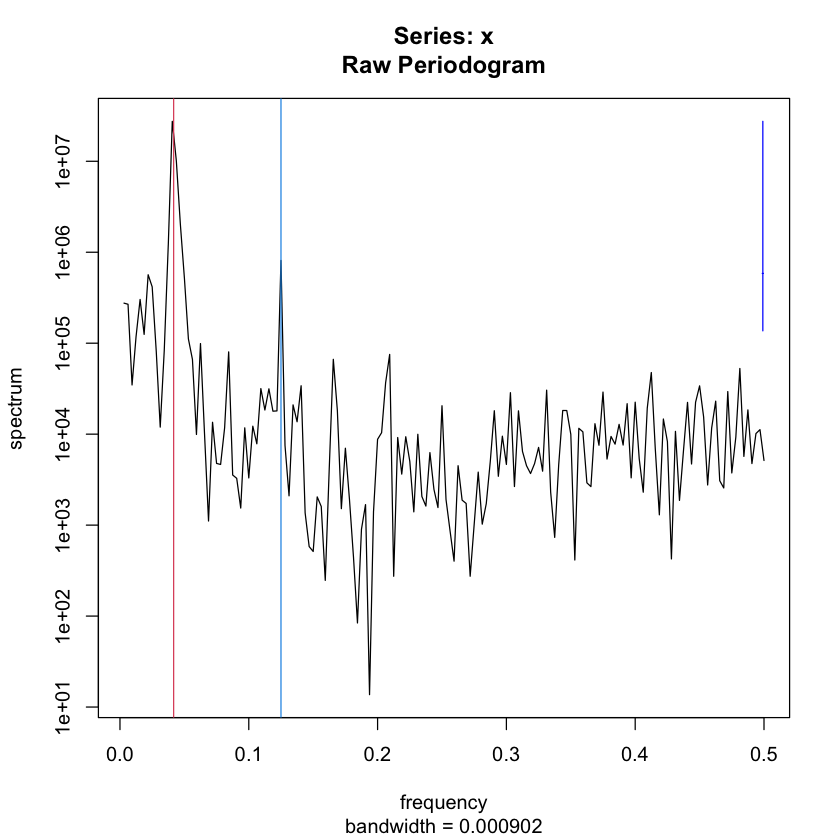

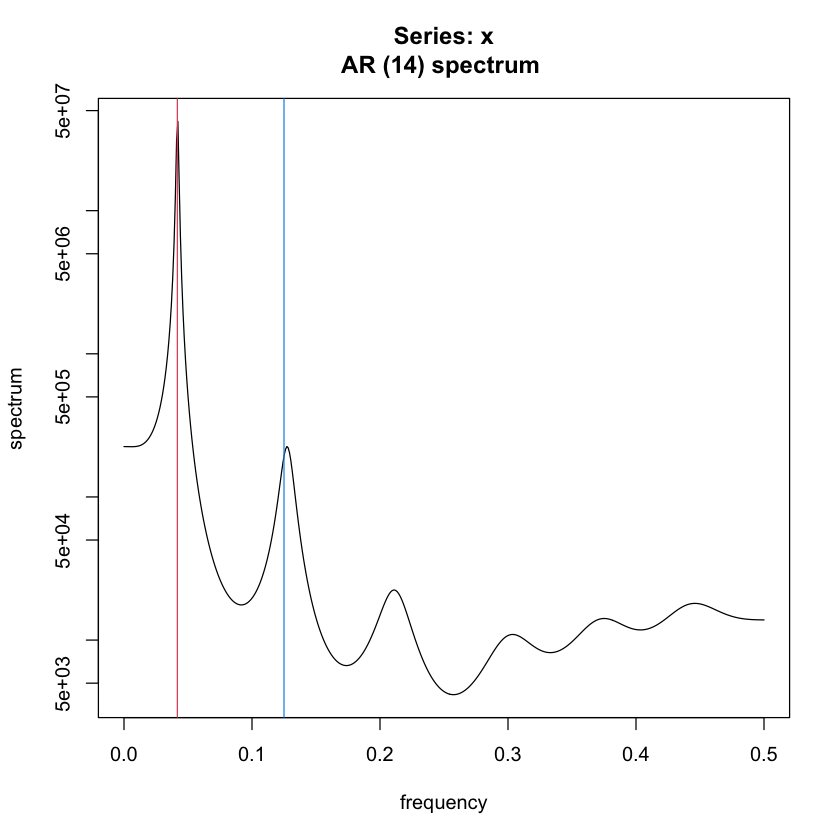

In [25]:
# [3.2.3c]
spectrum(ecWedR_M,method="pgram")
abline(v=1/24,col=2)
abline(v=1/8,col=4)
# [3.2.4]
spectrum(ecWedR_M,method="ar")
abline(v=1/24,col=2)
abline(v=1/8,col=4)

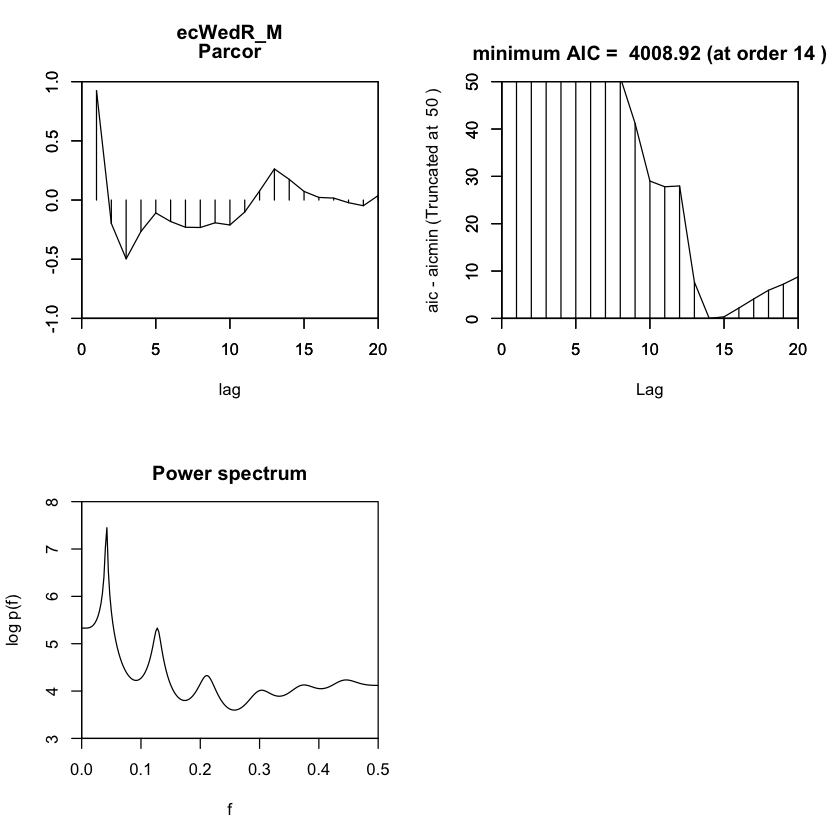

In [26]:
# [3.2.5]
arfit(ecWedR_M, lag=20, method=1)

# 3-3
<img src="img/3-3.png">

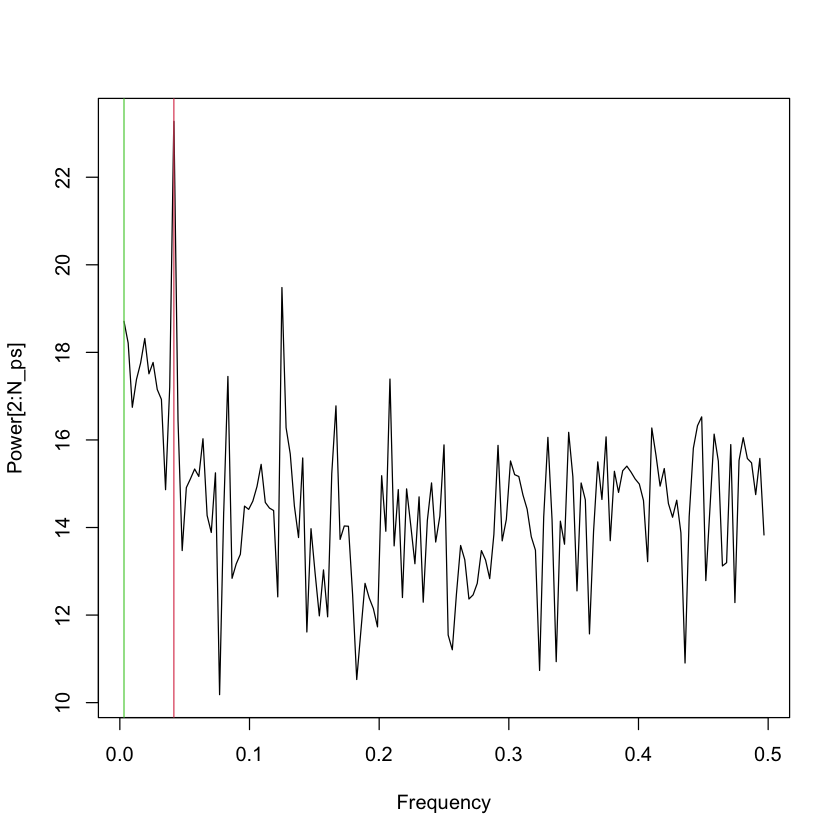

In [27]:
# [3.3.1]
# FFT をかける
fft_result <- fft(ecWedR_M)
# print(length(ecWedR_M))
N_ps <- length(fft_result)/2
# [3.3.2]
Power <- log( Mod(fft_result)^2 )
freq <- (seq(1:(N_ps-1))/N_ps)*0.5
# print(length(Power))
plot(freq, Power[2:N_ps],type='l', xlab='Frequency')
abline(v=1/N_ps*0.5,col=3)
abline(v=1/24,col=2)

# 3-4
<img src="img/3-4.png">

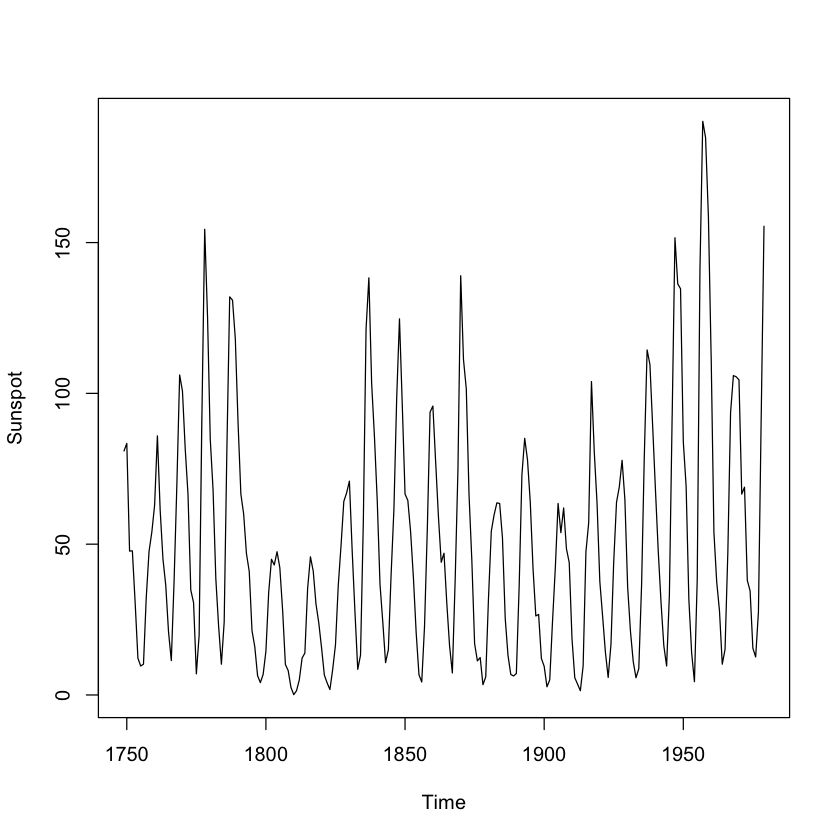

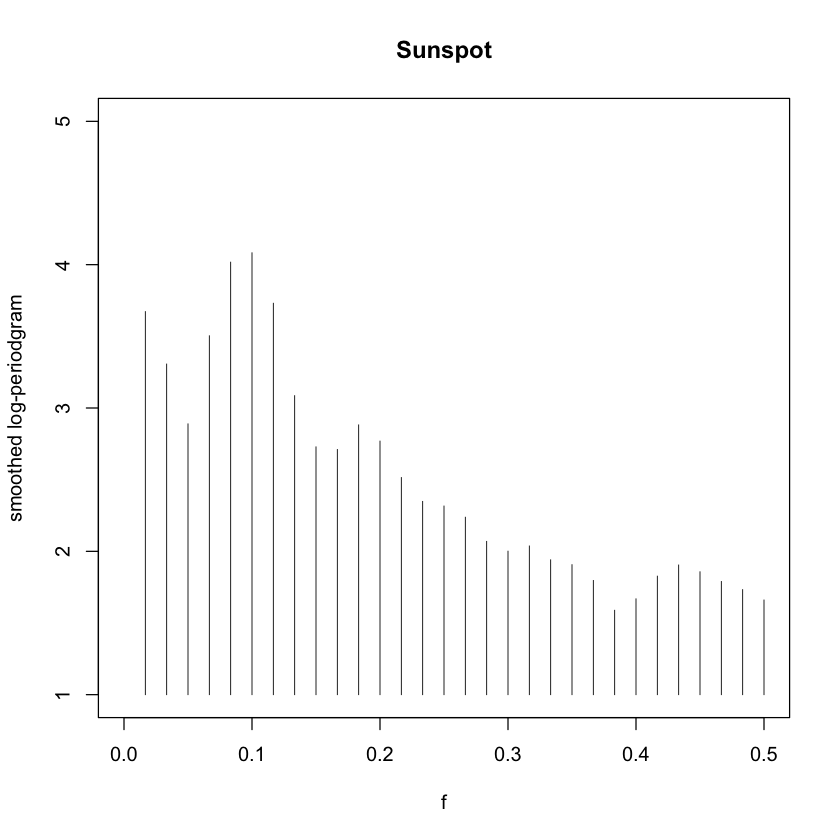

In [28]:
# [3.4.1]
# ライブラリーの読み込み & data の読み込み
# library(TSSS)  すでに上で実行しているため
data( Sunspot )
# 太陽黒点データ in TSSS のプロット、自己相関、パワースペクトル
# in TSSS と記してあるデータは、ライブラリー TSSS に入っている独自のデータを示す
plot( Sunspot, type="l")
# [3.4.1b]
period( Sunspot )  # ペリオドグラムを求める


 lambda    aic'         LL'         aic          LL        mean
           variance

  1.00     2360.37    -1178.19     2360.37    -1178.19   4.910866e+01   1.576345e+03

  0.90     2335.48    -1165.74     2174.59    -1085.29   3.546734e+01   7.052906e+02

  0.80     2313.88    -1154.94     1992.09     -994.04   2.591715e+01   3.200762e+02

  0.70     2295.85    -1145.93     1813.16     -904.58   1.917797e+01   1.475255e+02

  0.60     2281.75    -1138.87     1638.16     -817.08   1.438208e+01   6.915929e+01

  0.50     2271.96    -1133.98     1467.48     -731.74   1.093834e+01   3.303407e+01

  0.40     2267.00    -1131.50     1301.62     -648.81   8.441855e+00   1.611155e+01

  0.30     2267.51    -1131.76     1141.24     -568.62   6.613792e+00   8.046373e+00

  0.20     2274.40    -1135.20      987.23     -491.61   5.260971e+00   4.131024e+00

  0.10     2289.01    -1142.51      840.94     -418.47   4.248735e+00   2.192978e+00

  0.00     2313.40    -1154.70      704.44     -350.22

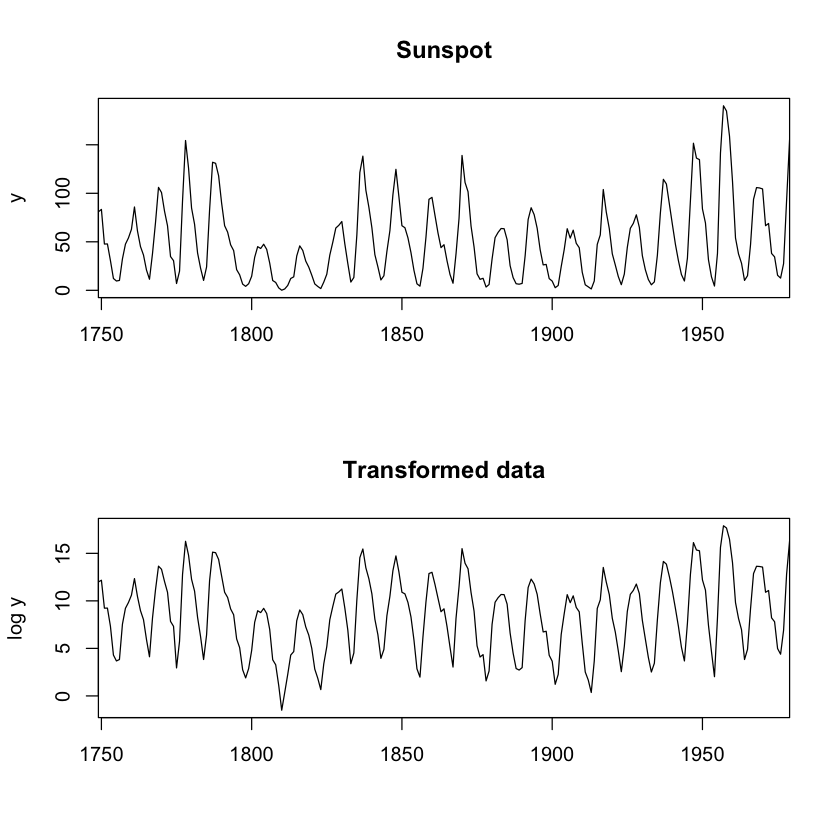

In [29]:
# [3.4.2]
# library(TSSS)  すでに上で読み込み済み
# 最適な Box-Cox 変換を求める in TSSS
boxcox( Sunspot )

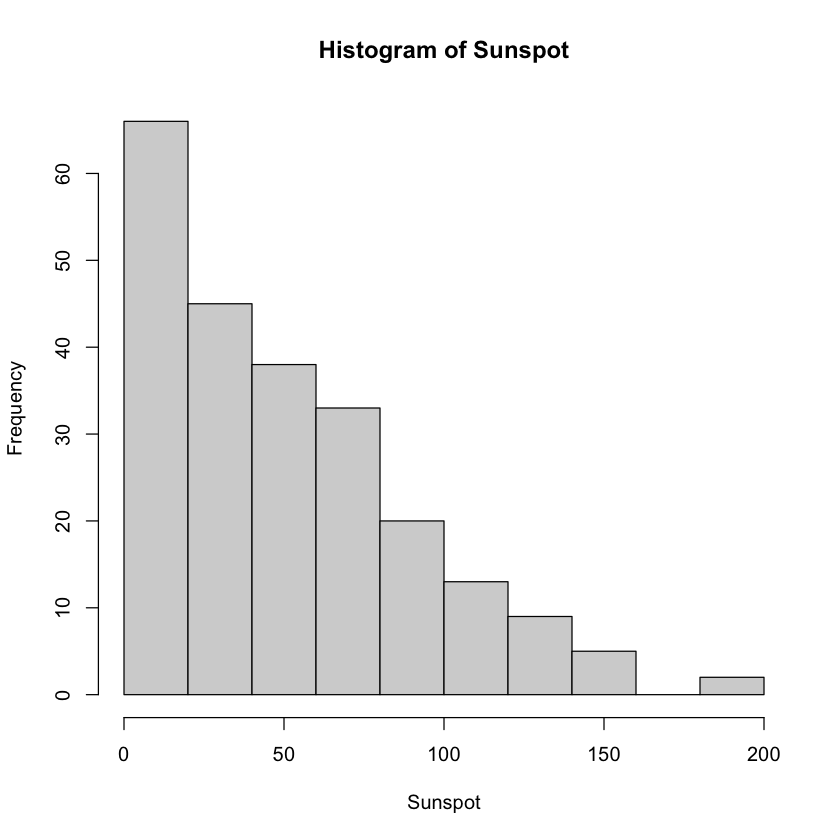

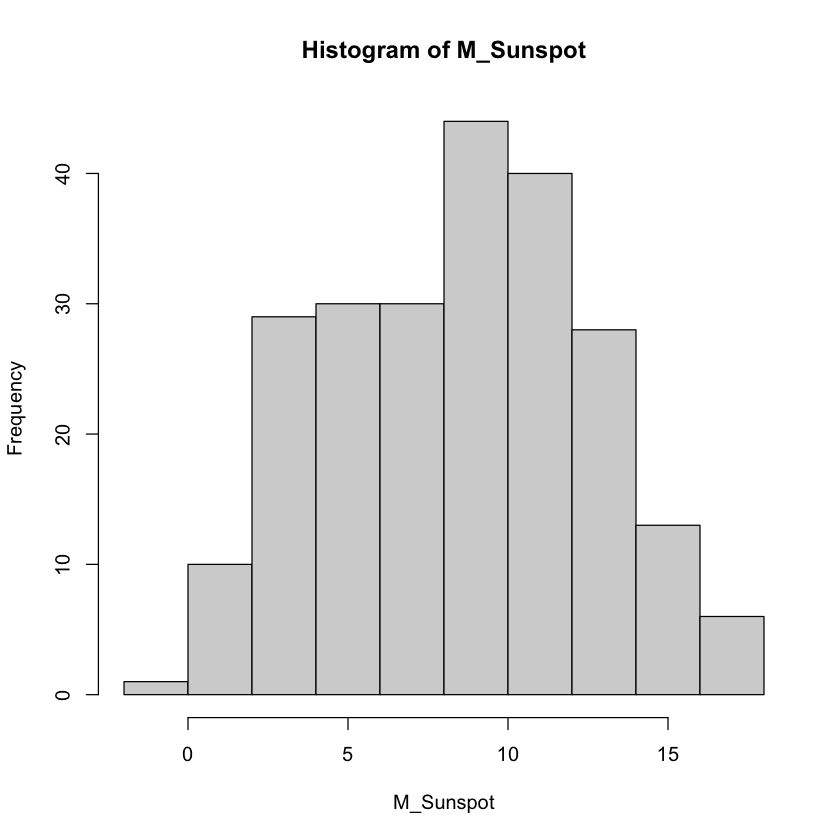

In [30]:
# [3.4.3]
L_Best <- 0.4
M_Sunspot <- (Sunspot^L_Best - 1.0)/L_Best
hist(Sunspot)
hist(M_Sunspot)

In [31]:
# [3.4.x]
# ARモデルを当てはめパワースペクトルを求める in TSSS
# arfit( M_Sunspot, lag=20, method= 1)


 lambda    aic'         LL'         aic          LL        mean
           variance

  1.00     4815.72    -2405.86     4815.72    -2405.86   1.477077e+03   2.919431e+05

  0.90     4811.52    -2403.76     4360.50    -2178.25   7.856263e+02   6.786512e+04

  0.80     4807.84    -2401.92     3905.80    -1950.90   4.232922e+02   1.580197e+04

  0.70     4804.67    -2400.34     3451.61    -1723.81   2.316092e+02   3.685500e+03

  0.60     4802.03    -2399.01     2997.95    -1496.97   1.290927e+02   8.610061e+02

  0.50     4799.90    -2397.95     2544.80    -1270.40   7.356998e+01   2.014856e+02

  0.40     4798.30    -2397.15     2092.18    -1044.09   4.305745e+01   4.722946e+01

  0.30     4797.23    -2396.62     1640.09     -818.05   2.600332e+01   1.108959e+01

  0.20     4796.69    -2396.35     1188.53     -592.26   1.628300e+01   2.608280e+00

  0.10     4796.68    -2396.34      737.50     -366.75   1.061663e+01   6.145120e-01

  0.00     4797.20    -2396.60      286.99     -141.50

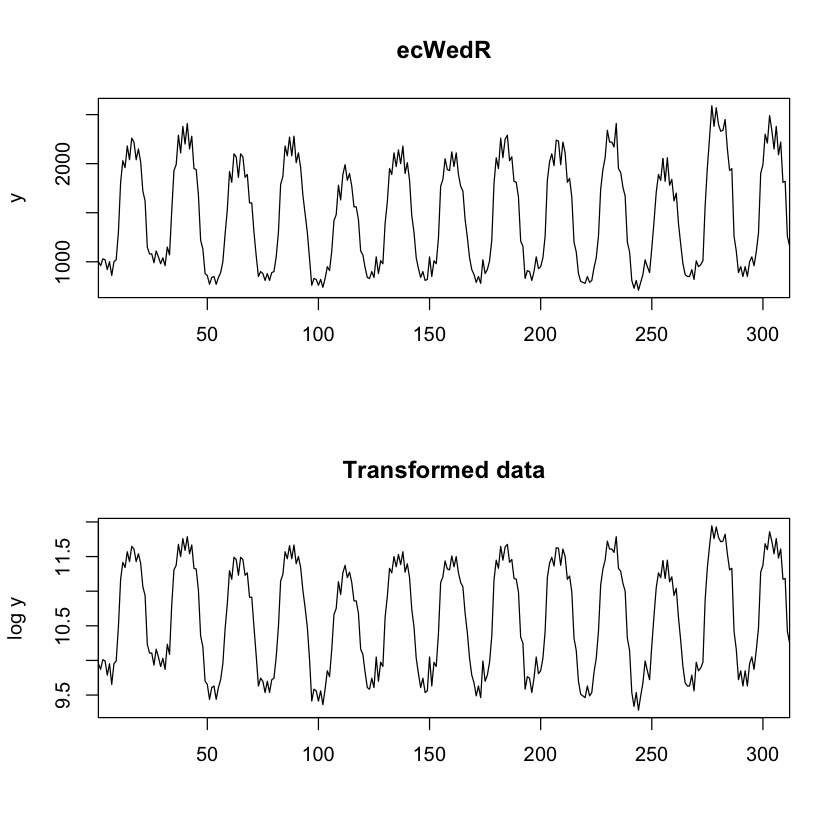

In [32]:
# [3.4.4]
boxcox(ecWedR)

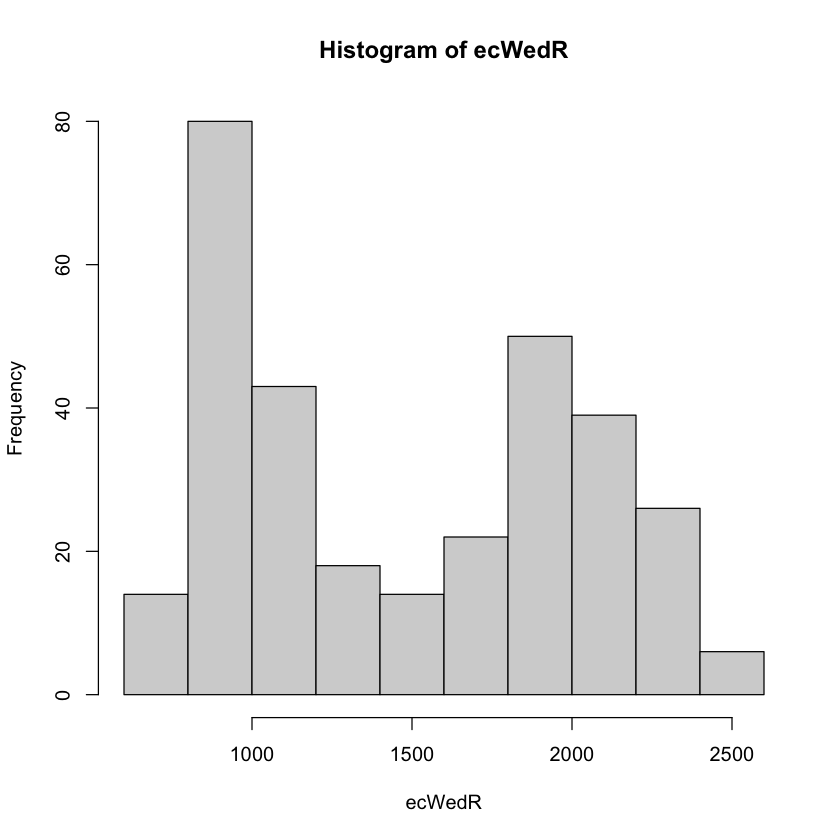

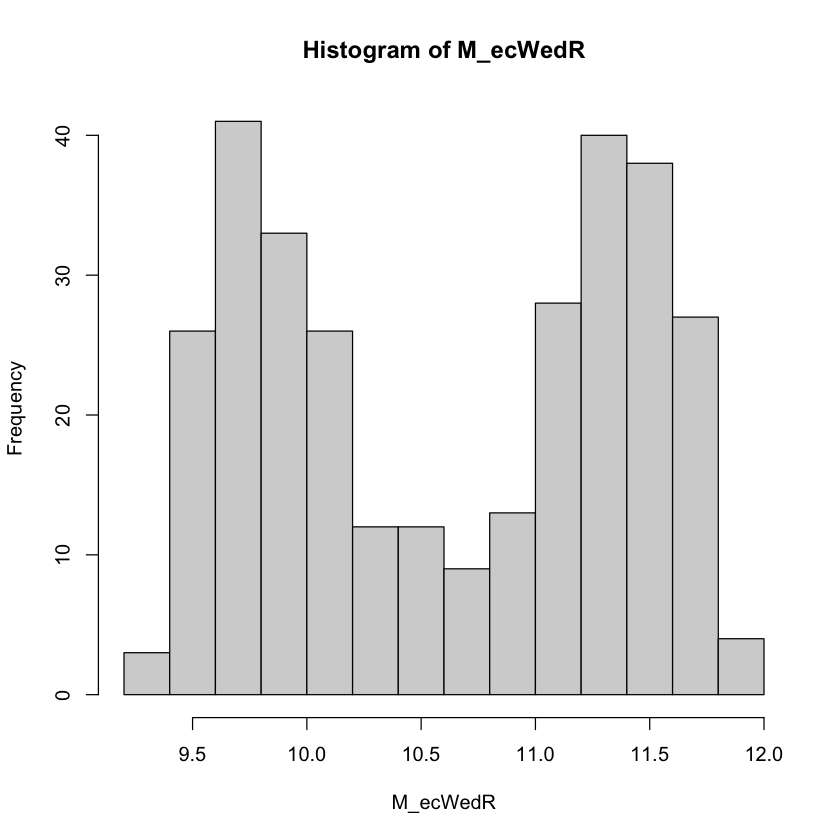

In [33]:
# [3.4.5]
hist( ecWedR)
L_Best <- 0.1
M_ecWedR <- (ecWedR^L_Best - 1.0)/L_Best
hist(M_ecWedR)
# hist(log(ecWedR))

In [34]:
# boxcox
install.packages("zoo")
library(zoo)


ダウンロードされたパッケージは、以下にあります
	/var/folders/3b/3hxgpzc57b70j4b1d7my6wfc0000gn/T//RtmpKr73lU/downloaded_packages



次のパッケージを付け加えます: ‘zoo’


以下のオブジェクトは ‘package:base’ からマスクされています:

    as.Date, as.Date.numeric




# 3-5
<img src="img/3-5.png">

 [1]        NA        NA        NA        NA        NA        NA        NA
 [8]        NA        NA        NA        NA        NA  20.72308  20.32308
[15]  26.32308  27.12308  25.52308  30.32308  28.72308  40.32308  43.12308
[22]  63.12308  88.32308  95.52308 105.92308 111.92308 119.92308 126.32308
[29] 132.32308 129.52308


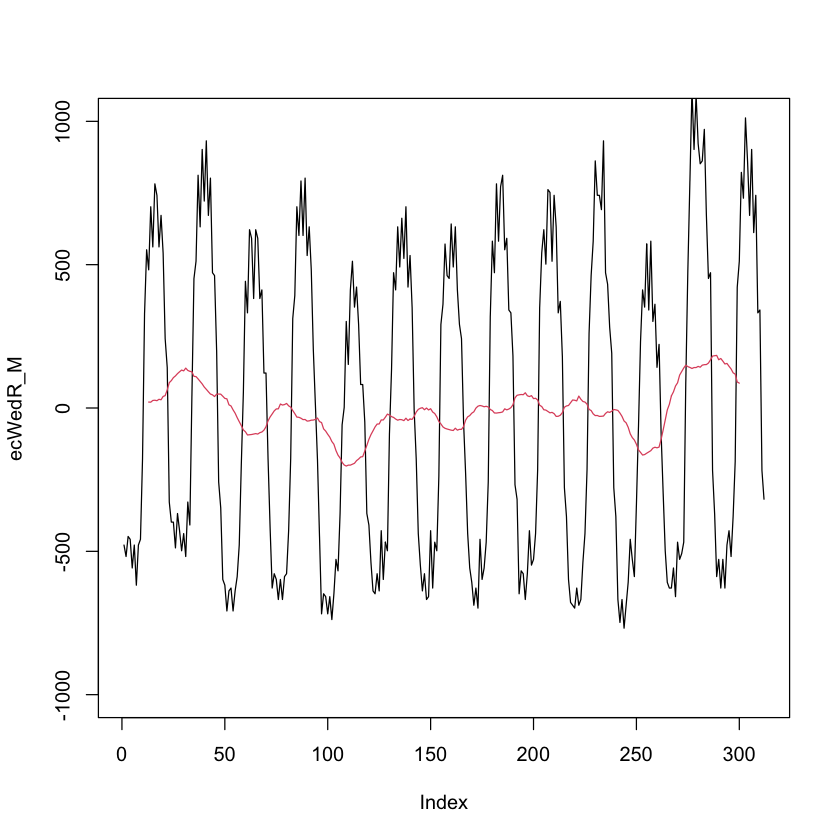

In [35]:
# [3.5.1]
MA25 <- rollmean(ecWedR_M, k=25, fill=NA)
plot(ecWedR_M,type="l",ylim=c(-1000,1000))
lines(MA25,col=2)
print(MA25[1:30])

 [1] 122.72308 118.32308  90.72308  86.72308        NA        NA        NA
 [8]        NA        NA        NA        NA        NA        NA        NA
[15]        NA        NA


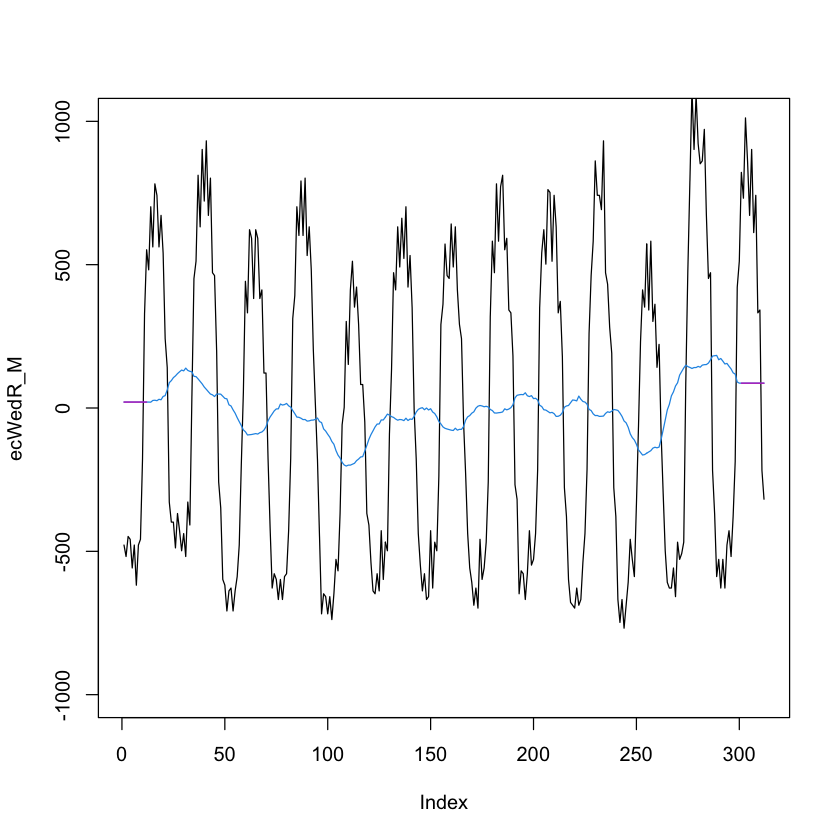

In [36]:
# [3.5.2]
N_Wed <- length(MA25)
# print(N_Wed)
# print(MA25[1:30])
MA25[1:12] <- MA25[13]
print(MA25[(N_Wed-15):N_Wed])
MA25[(N_Wed-11):N_Wed] <- MA25[N_Wed-12]
MA25x <- seq(from=1,to=N_Wed)
# print(MA25[(N_Wed-15):N_Wed])
 plot(ecWedR_M,type="l",ylim=c(-1000,1000))
lines(MA25x, MA25,col=4)
lines(MA25x[1:12], MA25[1:12],col=6)
lines(MA25x[(N_Wed-11):N_Wed], MA25[(N_Wed-11):N_Wed],col=6)

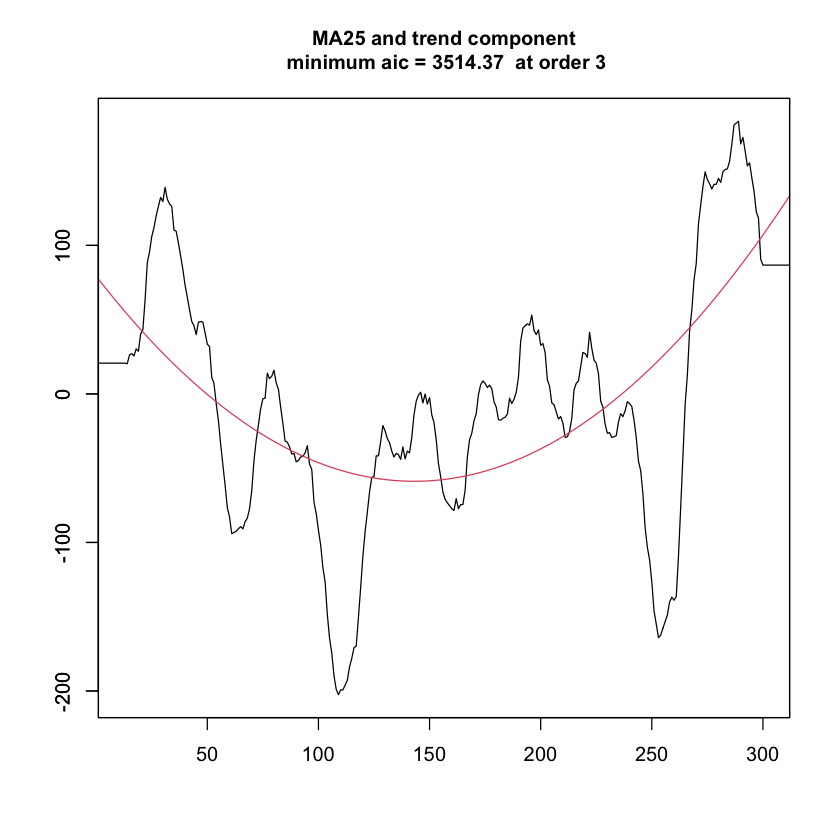

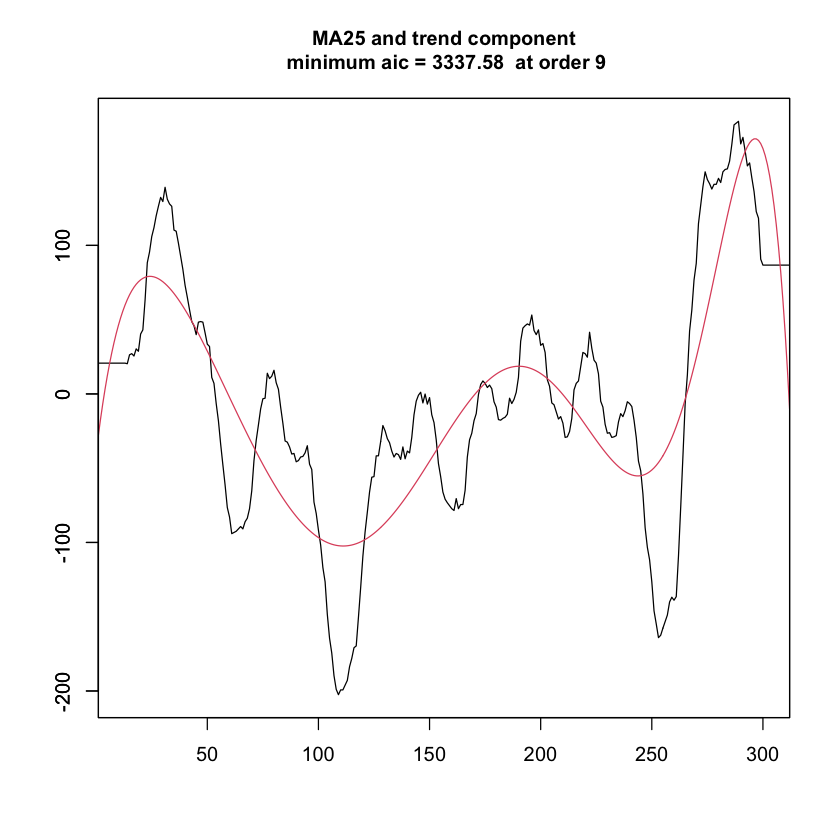

In [37]:
# [3.5.3]
# 多項式フィットモデルの当てはめ in TSSS
polreg( MA25, order=3 )
polreg( MA25, order=10 )

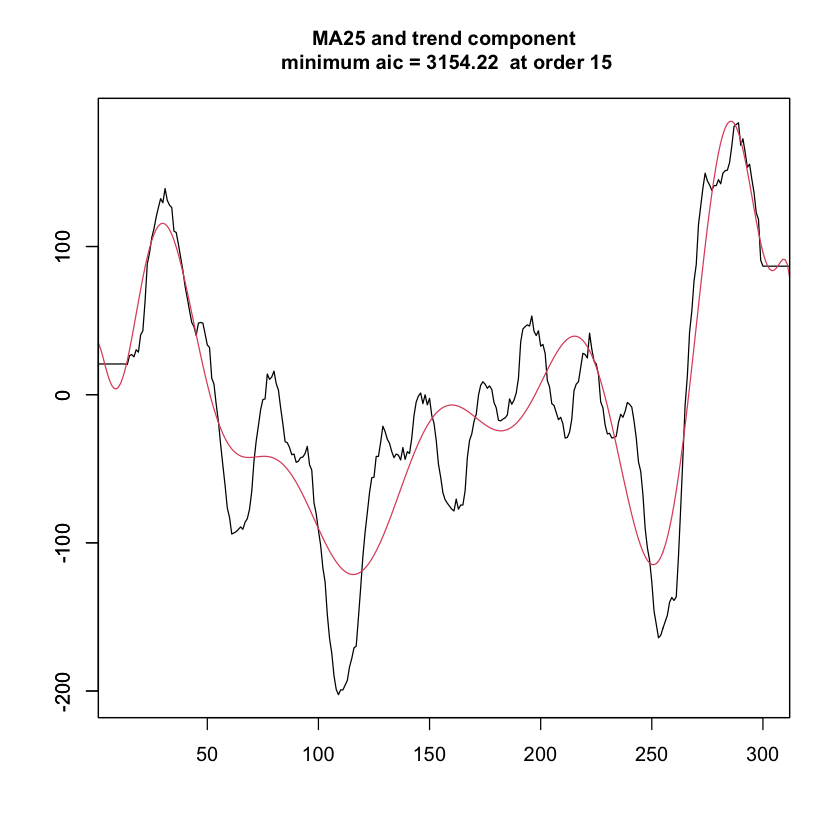

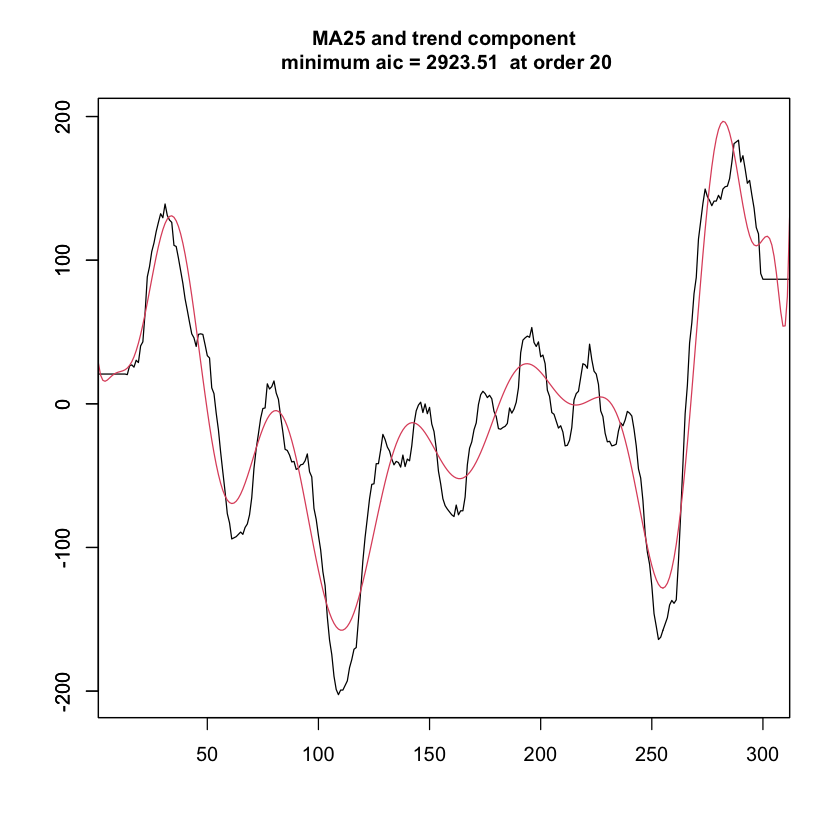

In [38]:
polreg( MA25, order=15 )
polreg( MA25, order=20 )

# 4-1
<img src="img/4-1.png">


 tau2 		 1.00000e-02

 sigma2 	 1.67978e-01

 log-likelihood	    -110.426

 aic		     228.852




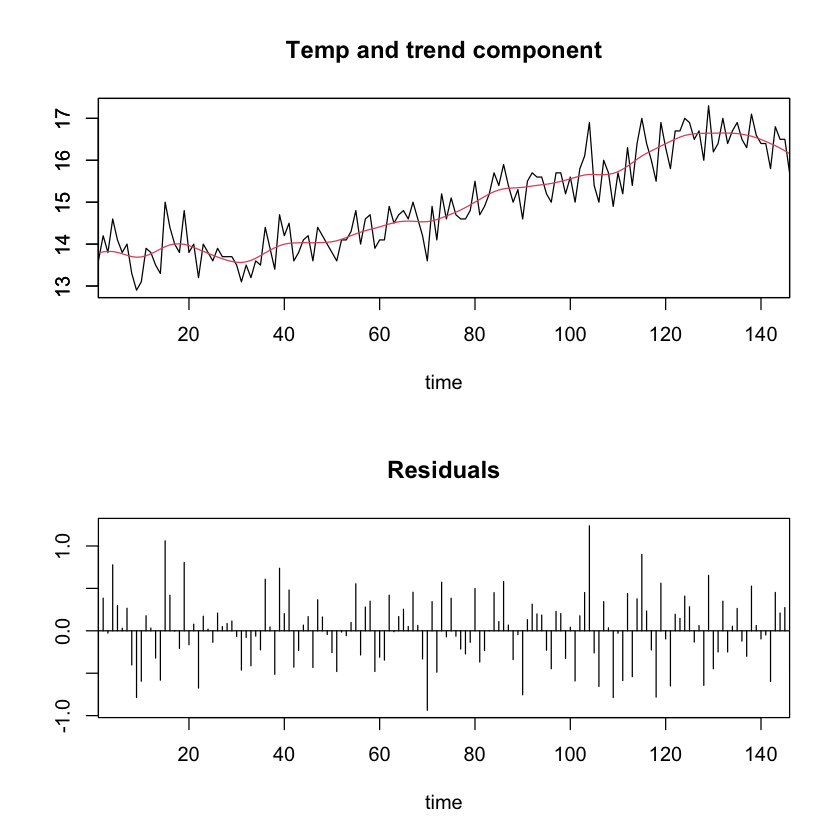

In [39]:
# [4.1.1]
trend( Temp, trend.order=2, tau2.ini=0.01, delta=0.1)

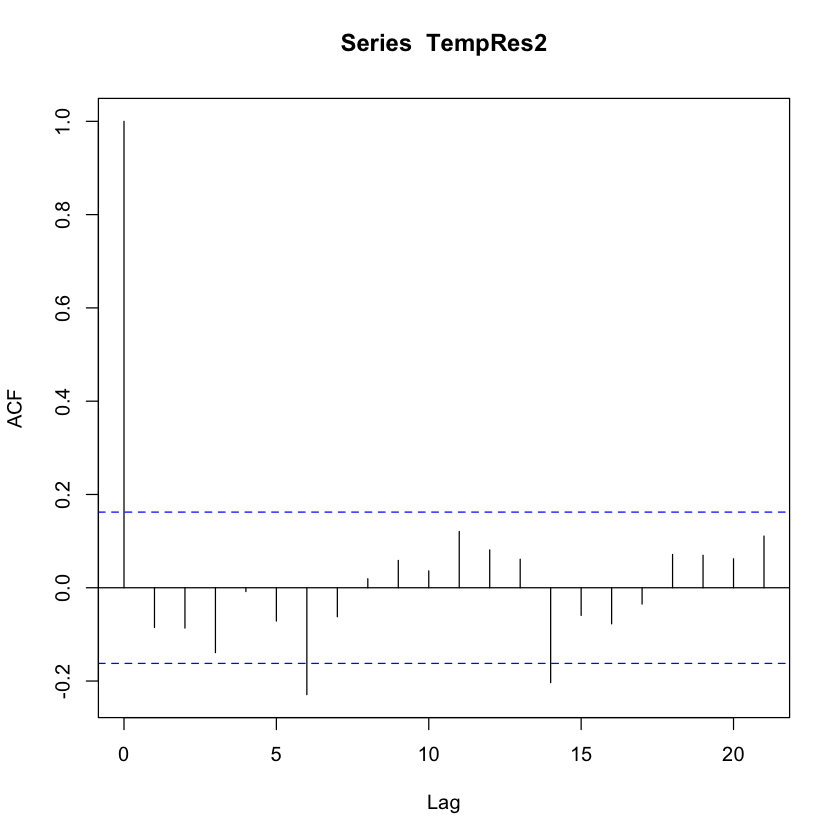

In [40]:
# [4.1.2]
TempTr <- trend( Temp, trend.order=2, tau2.ini=0.01, delta=0.1, plot=FALSE)
TempRes2 <- TempTr$residual
acf(TempRes2)


 tau2 		 1.01000e-03

 sigma2 	 7.69560e+02

 log-likelihood	   -1528.759

 aic		    3065.519




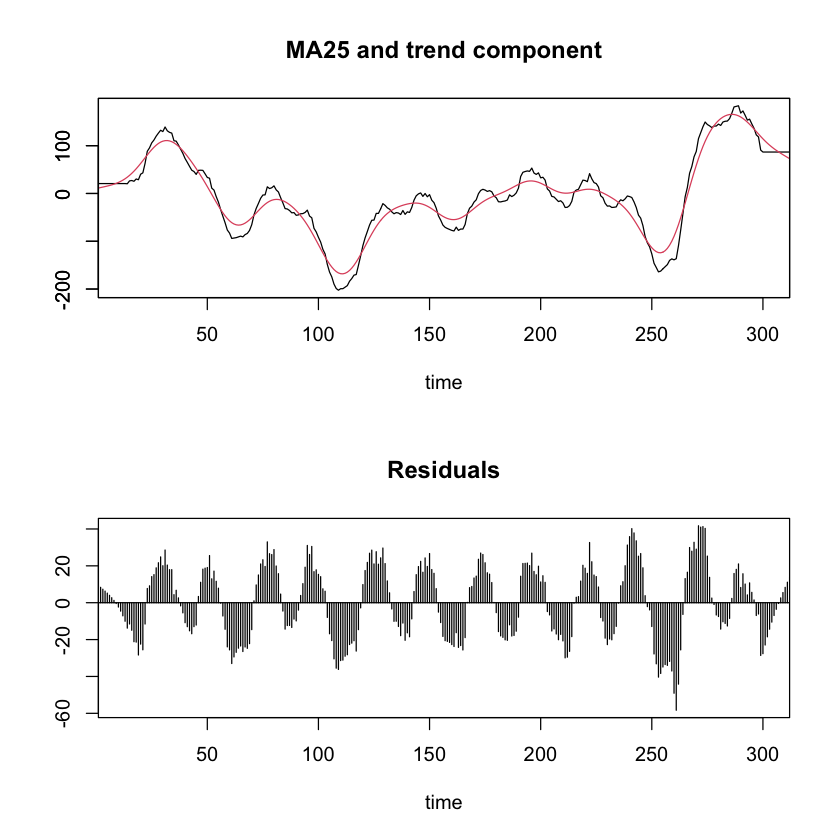

In [41]:
# [4.1.3]
trend( MA25, trend.order=2, tau2.ini=0.00001, delta=0.0001)


 tau2 		 1.01000e-03

 sigma2 	 4.56176e+03

 log-likelihood	   -1767.175

 aic		    3540.349




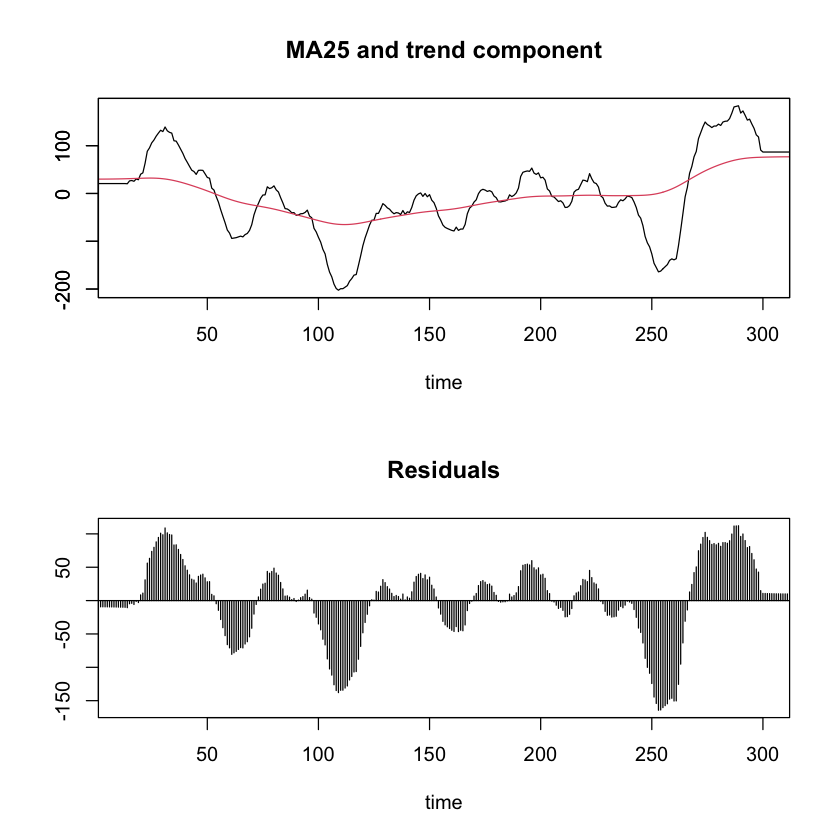

In [42]:
# [4.1.4]
# トレンドモデルのあてはめ in TSSS
trend( MA25, trend.order=1, tau2.ini = 0.00001, delta=0.0001)

# 4-2
<img src="img/4-2.png">

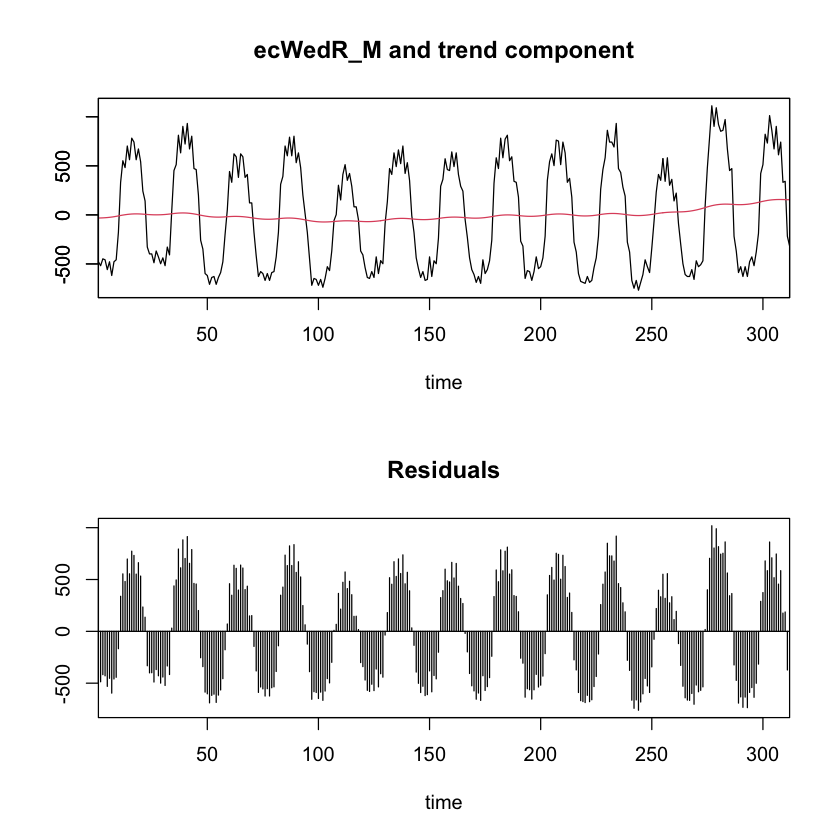

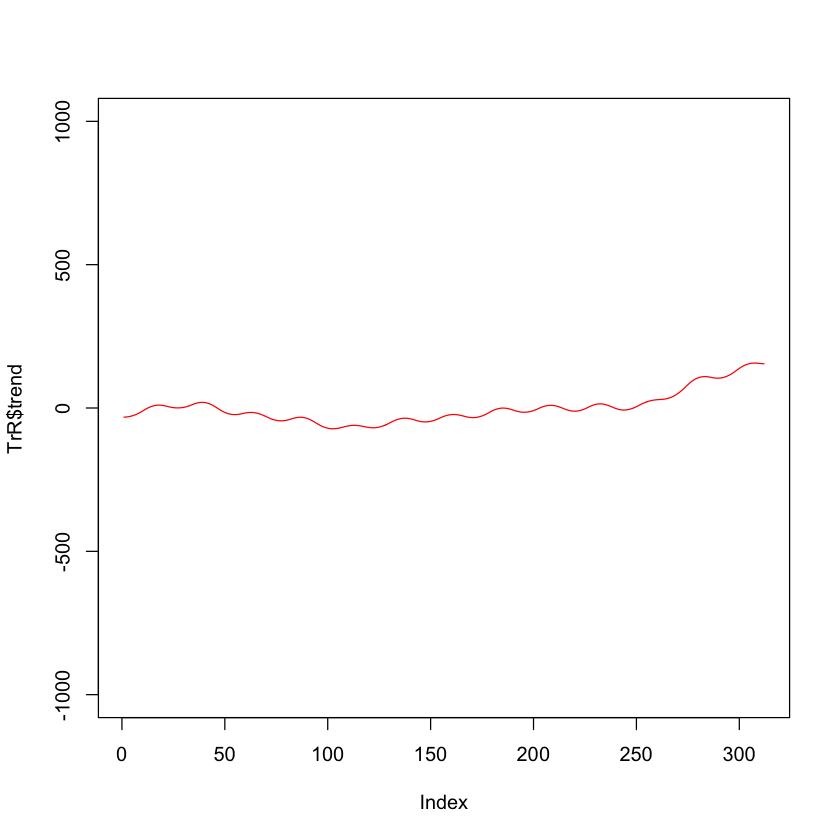

In [43]:
# [4.2.1]
TrR <- trend( ecWedR_M, trend.order=1,  tau2.ini = 0.00001, delta=0.0001, plot = T)
plot(TrR$trend, type="l", col="red",ylim=c(-1000,1000))
# TrR2 <- trend( ecWedR_M, trend.order=2,  tau2.ini = 0.00001, delta=0.001, plot = T)
# plot(TrR2$trend, type="l", col="red",ylim=c(-1000,1000))

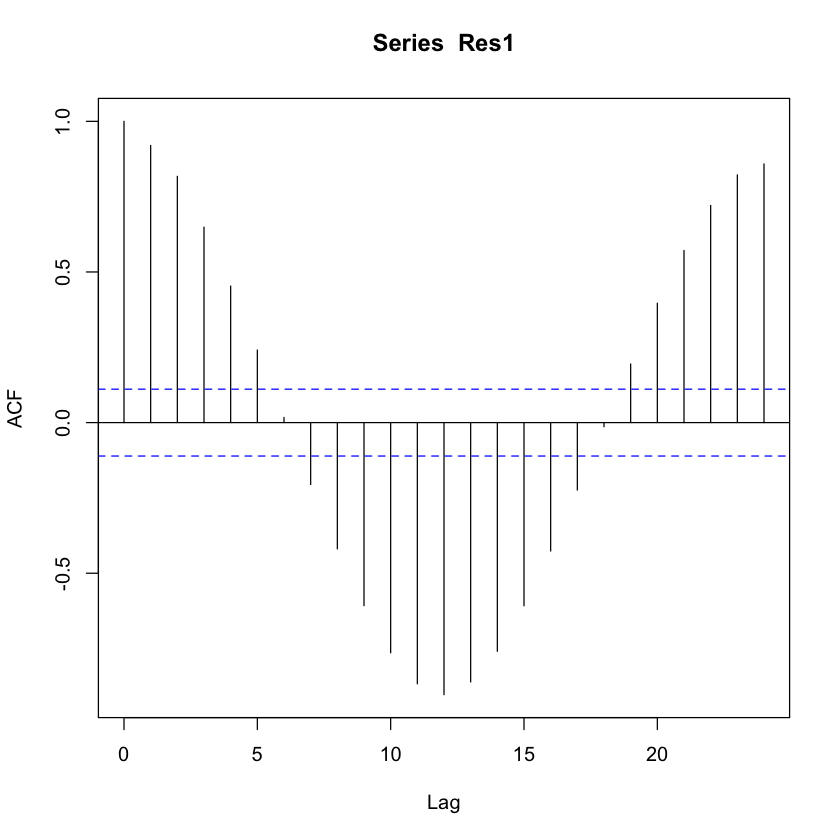

In [44]:
# [4.2.2]
Res1 <- TrR$residual
acf(Res1)  # 自己相関関数の描画

# 4-3
<img src="img/4-3-1.png">
<img src="img/4-3-2.png">

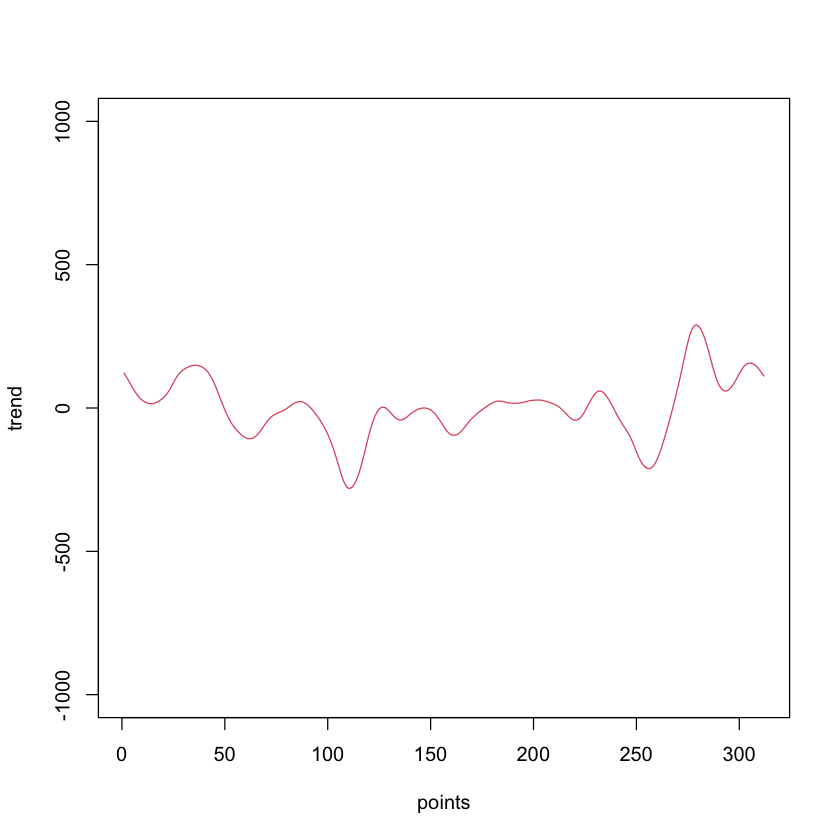

In [45]:
# [4.3.1]
# plot(ecWedR_M, type="l",ylim=c(-1000,1000))
# print(ecWedR_M[1:100])
SAR <- season( ecWedR_M, trend.order=2, seasonal.order=1, period=24, plot = F)  # 図を出さ
TR1 <- SAR$trend   # オブジェクトの変数から、数値ベクトルに変換
# print(TR1[1:48])
# [4.3.2]
plot(TR1, type="l", col=2, xlab="points", ylab="trend",ylim=c(-1000,1000))

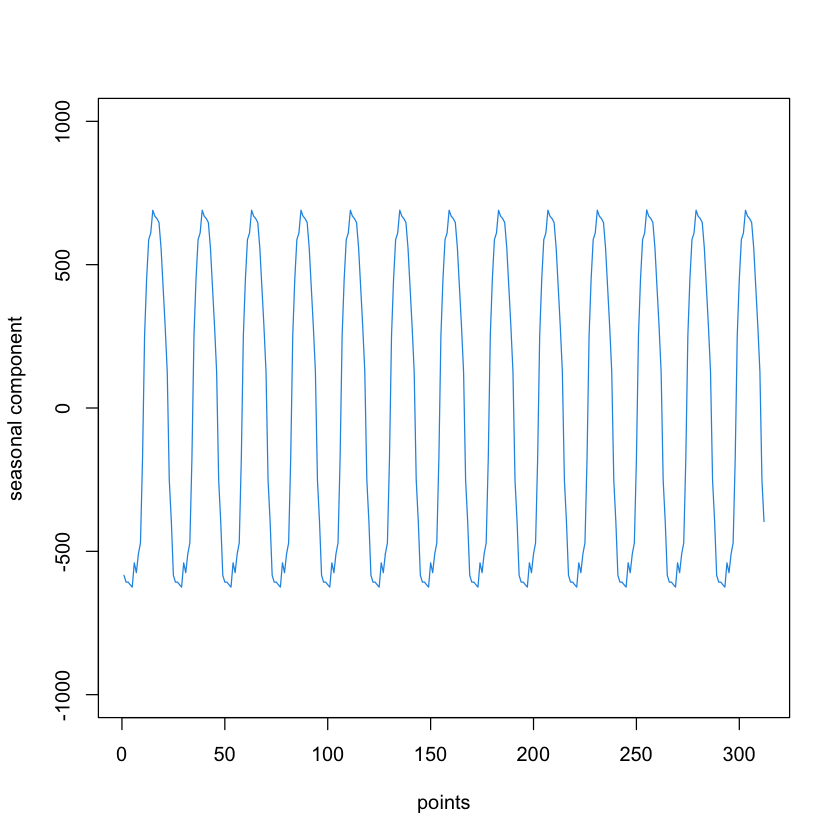

In [46]:
# [4.3.3]
SA1 <- SAR$seasonal  # オブジェクトの変数から、数値ベクトルに変換
plot(SA1, type="l", col=4, xlab="points", ylab="seasonal component", ylim=c(-1000,1000))

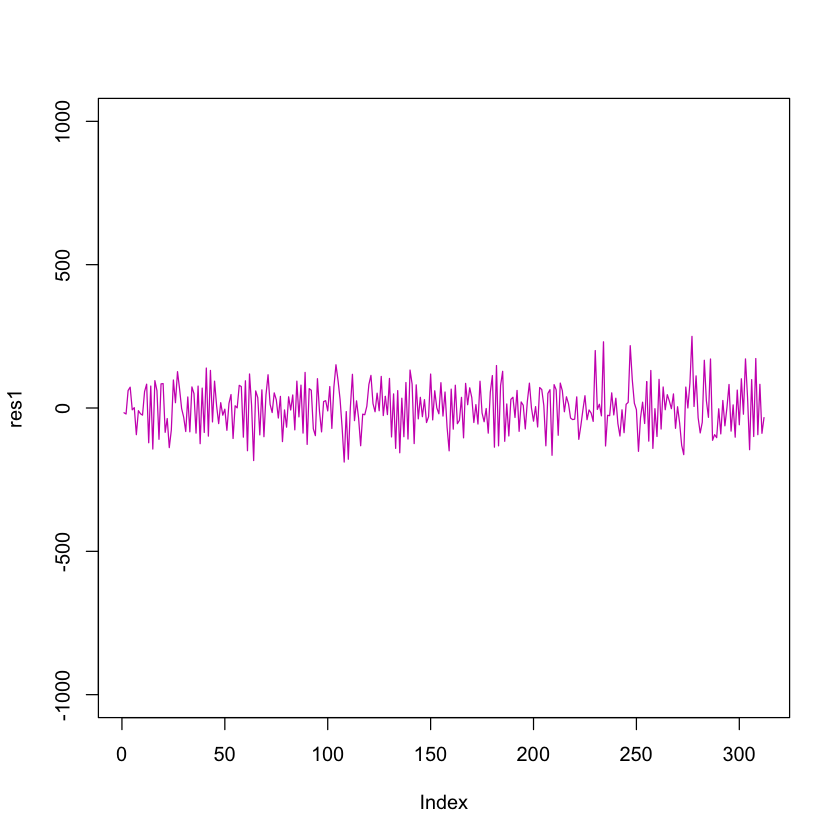

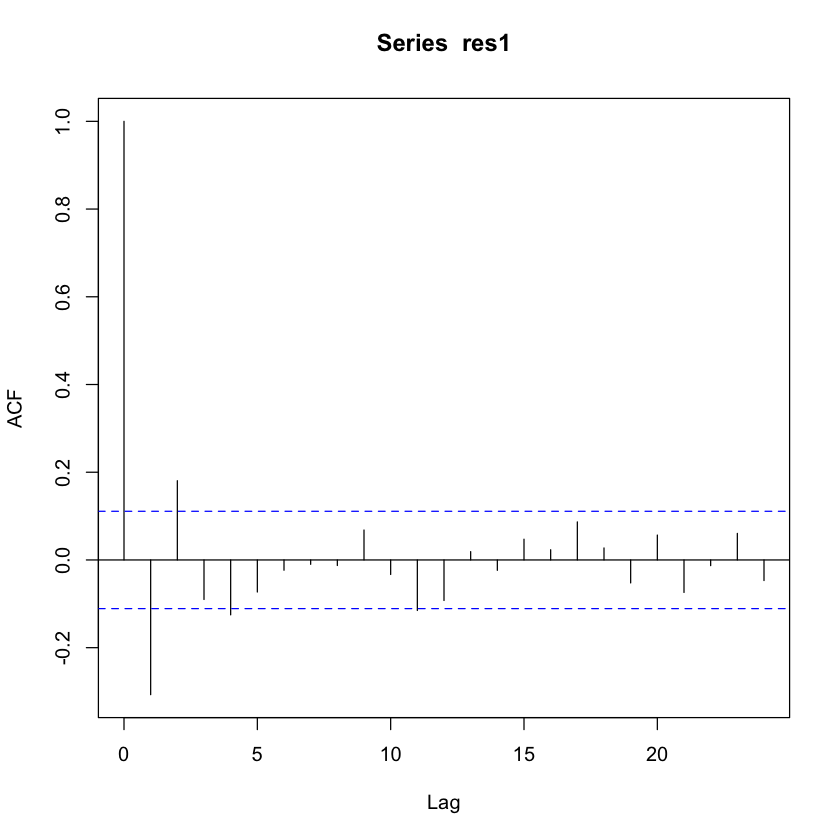

In [47]:
# [4.3.4]
res1 <- ecWedR_M - ( SAR$trend + SAR$seasonal )
# オブジェクトの変数　noise　は残差成分だけでなく、複数の変数を結合したリストになっている
plot(res1, type="l", col=6, ylim=c(-1000,1000))
# [4.3.5]
acf(res1)

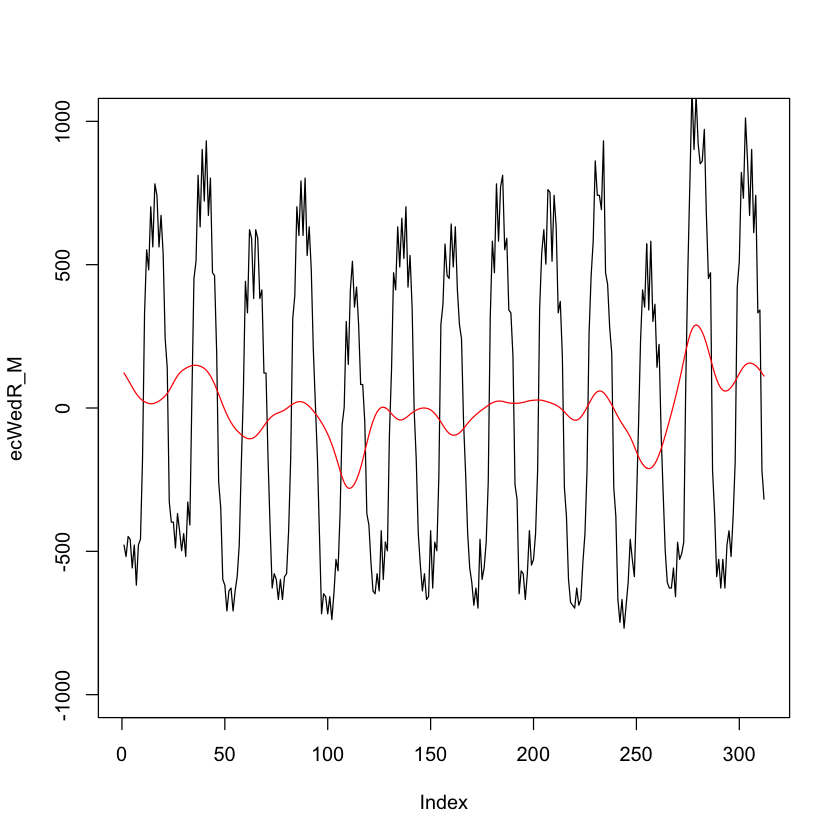

In [48]:
# [4.3.6]
plot(ecWedR_M, type="l",ylim=c(-1000,1000))
# par(new=T)
lines(SAR$trend, col="red",ylim=c(-1000,1000),type="l", )
# lines(SAR$trend+SAR$seasonal,col=4)

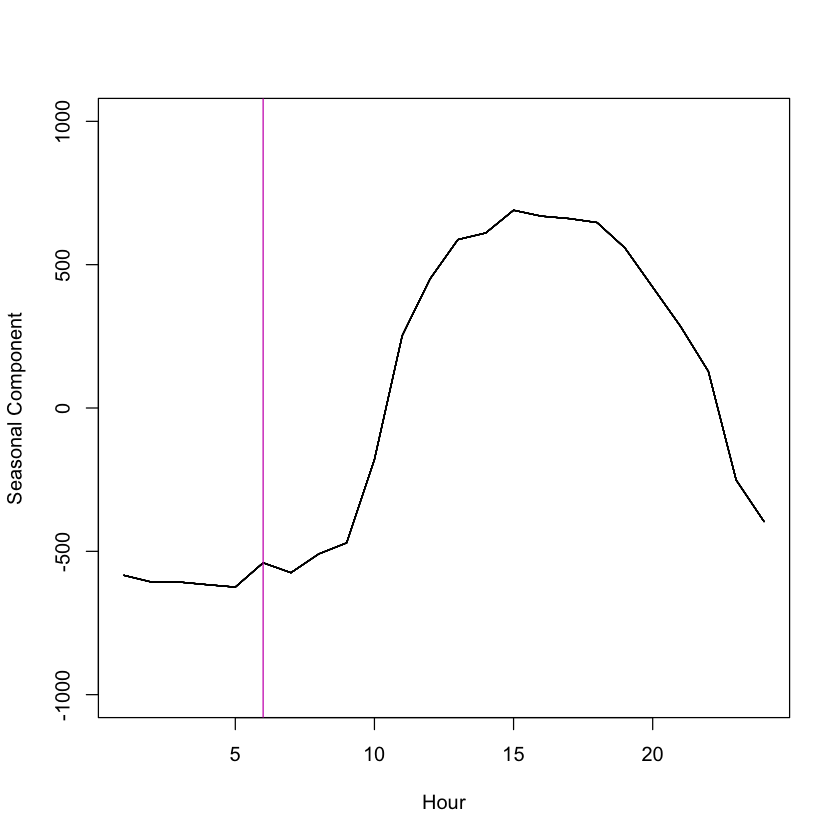

In [49]:
# [4.3.7]
HourinDay <- rep(c(1:24), length.out = N_Wed) #　最初の時間帯は0時台。
N_WedDay <- N_Wed/24
plot(HourinDay[1:24], SA1[1:24], type="l",ylim=c(-1000,1000),xlab="Hour",ylab="Seasonal Component")
# print(N_Wed) ; print(N_WedDay)
# plot(HourinDay,SA1,type="l")
for (kk in 2:N_WedDay) {
  k1 <- (kk-1)*24+1
  k2 <-  kk*24
    lines(HourinDay[k1:k2], SA1[k1:k2])
}
abline(v=6,col=6)

# 4-4
<img src="img/4-4.png">

In [50]:
# [4.4.1]
install.packages("forecast")
library(forecast)  # 実行にかなり時間がかかる（目安　３分程度)
packageVersion("forecast")


ダウンロードされたパッケージは、以下にあります
	/var/folders/3b/3hxgpzc57b70j4b1d7my6wfc0000gn/T//RtmpKr73lU/downloaded_packages


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 method overwritten by 'tseries':
  method    from
  plot.arma TSSS



[1] ‘8.24.0’

In [51]:
# available.packages()["forecast", "Version"]

In [52]:
res_sarima <- Arima( y = ecWedR_M, order=c(2,0,0), seasonal=list(order=c(0,1,0), period=2))
res_sarima

Series: ecWedR_M 
ARIMA(2,0,0)(0,1,0)[2] 

Coefficients:
         ar1      ar2
      0.8541  -0.1088
s.e.  0.0564   0.0567

sigma^2 = 41380:  log likelihood = -2087.07
AIC=4180.13   AICc=4180.21   BIC=4191.34


	Ljung-Box test

data:  Residuals from ARIMA(2,0,0)(0,1,0)[2]
Q* = 27.061, df = 8, p-value = 0.0006901

Model df: 2.   Total lags used: 10



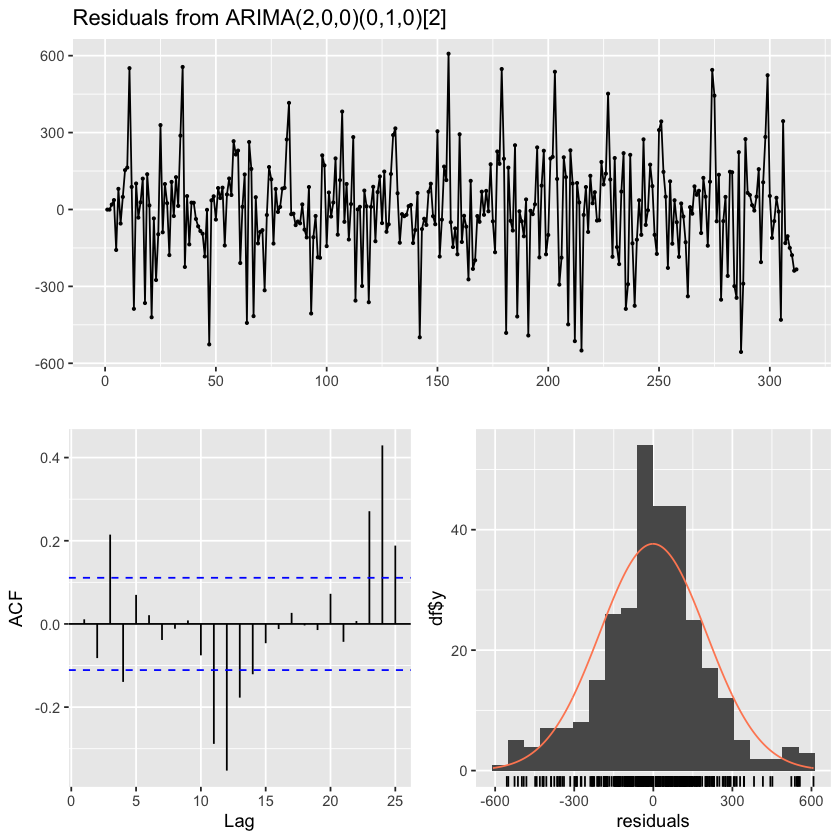

In [53]:
# [4.4.2]
checkresiduals(res_sarima)

In [54]:
# [4.4.4]
yy <- ts(ecWedR_M, frequency=24)
auto_arima <- auto.arima(yy, seasonal=TRUE, D=1)
print(auto_arima)

Series: yy 
ARIMA(2,0,2)(2,1,0)[24] with drift 

Coefficients:
         ar1     ar2      ma1     ma2     sar1     sar2   drift
      0.5490  0.3354  -0.4502  0.1474  -0.6620  -0.3134  0.1416
s.e.  0.1226  0.1231   0.1267  0.1059   0.0595   0.0639  0.8454

sigma^2 = 12546:  log likelihood = -1770.61
AIC=3557.22   AICc=3557.74   BIC=3586.53



	Ljung-Box test

data:  Residuals from ARIMA(2,0,2)(2,1,0)[24] with drift
Q* = 62.028, df = 42, p-value = 0.02379

Model df: 6.   Total lags used: 48



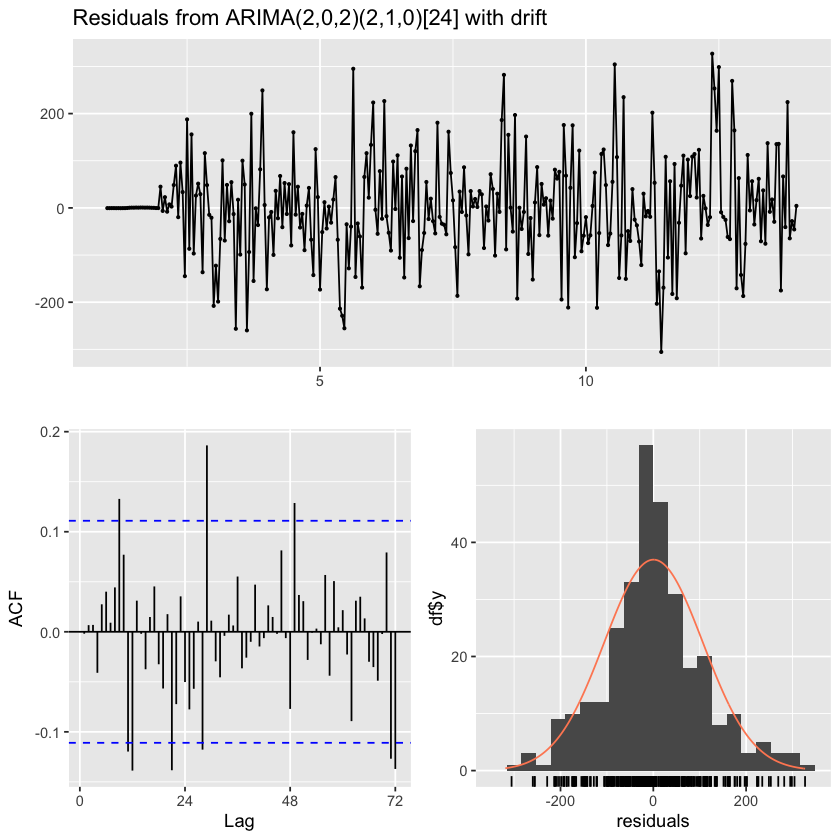

In [55]:
# [4.4.5]
checkresiduals(auto_arima)